In [2]:
import pandas as pd
import numpy as np
import math
from os.path import join
from collections import defaultdict
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import MaxNLocator
%matplotlib inline
plt.rcParams['font.family'] = 'IPAPGothic'

In [227]:
def boxplot(data, table, filename, _range='range'):
    print(_range)
    d = []
    label = []
    for k in data:
        d.append(data[k])
        label.append(table[k])
    fig, ax = plt.subplots(dpi=900)
    boxplot_dict = ax.boxplot(d)
    plt.xticks([x+1 for x in range(len(d))] , label)
    
    color_dict = {'A':'orange', 'B':'blue', 'C':'green', 'D': 'yellow', 'E': 'RED'}
    i=0
    for b in boxplot_dict['boxes']:
        lab = ax.get_xticklabels()[i].get_text()
        print("Label property of box {0} is {1}".format(i, lab))
        b.set_color(color_dict[lab])
        for k in data:
            if table[k] == lab:
                b.set_label("{0}: {1}".format(lab, k))
        i += 1
    plt.ylabel("実行時間（sec）")
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

In [9]:
import seaborn as sns
# sns.set_style(style="white")
sns.set(font='IPAPGothic', style="white")
def scatter_med(data, table, filename):
    label = []
    xtick = []
    value = []
    for k in data:
        for v in data[k]:
            value.append(v)
            label.append("{0}: {1}".format(table[k], k))
        xtick.append(table[k])
    df = pd.DataFrame({
        "category": label,
        "実行時間(sec)": value
    })
    median_width = 0.4
    meds = []
    for k in data:
        med = df.loc[df["category"] == "{0}: {1}".format(table[k], k)].median()['実行時間(sec)']
        meds.append(med)
    fig, ax = plt.subplots(dpi=900)
    sns.stripplot(x="category", y="実行時間(sec)", edgecolor="none", hue="category", palette="Set1", data=df, jitter=True)
    for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df[df['category']==sample_name]['実行時間(sec)'].median()

        # plot horizontal lines across the column, centered on the tick
        ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
    ax.set_xlabel('')
    ax.set_xticklabels(xtick)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

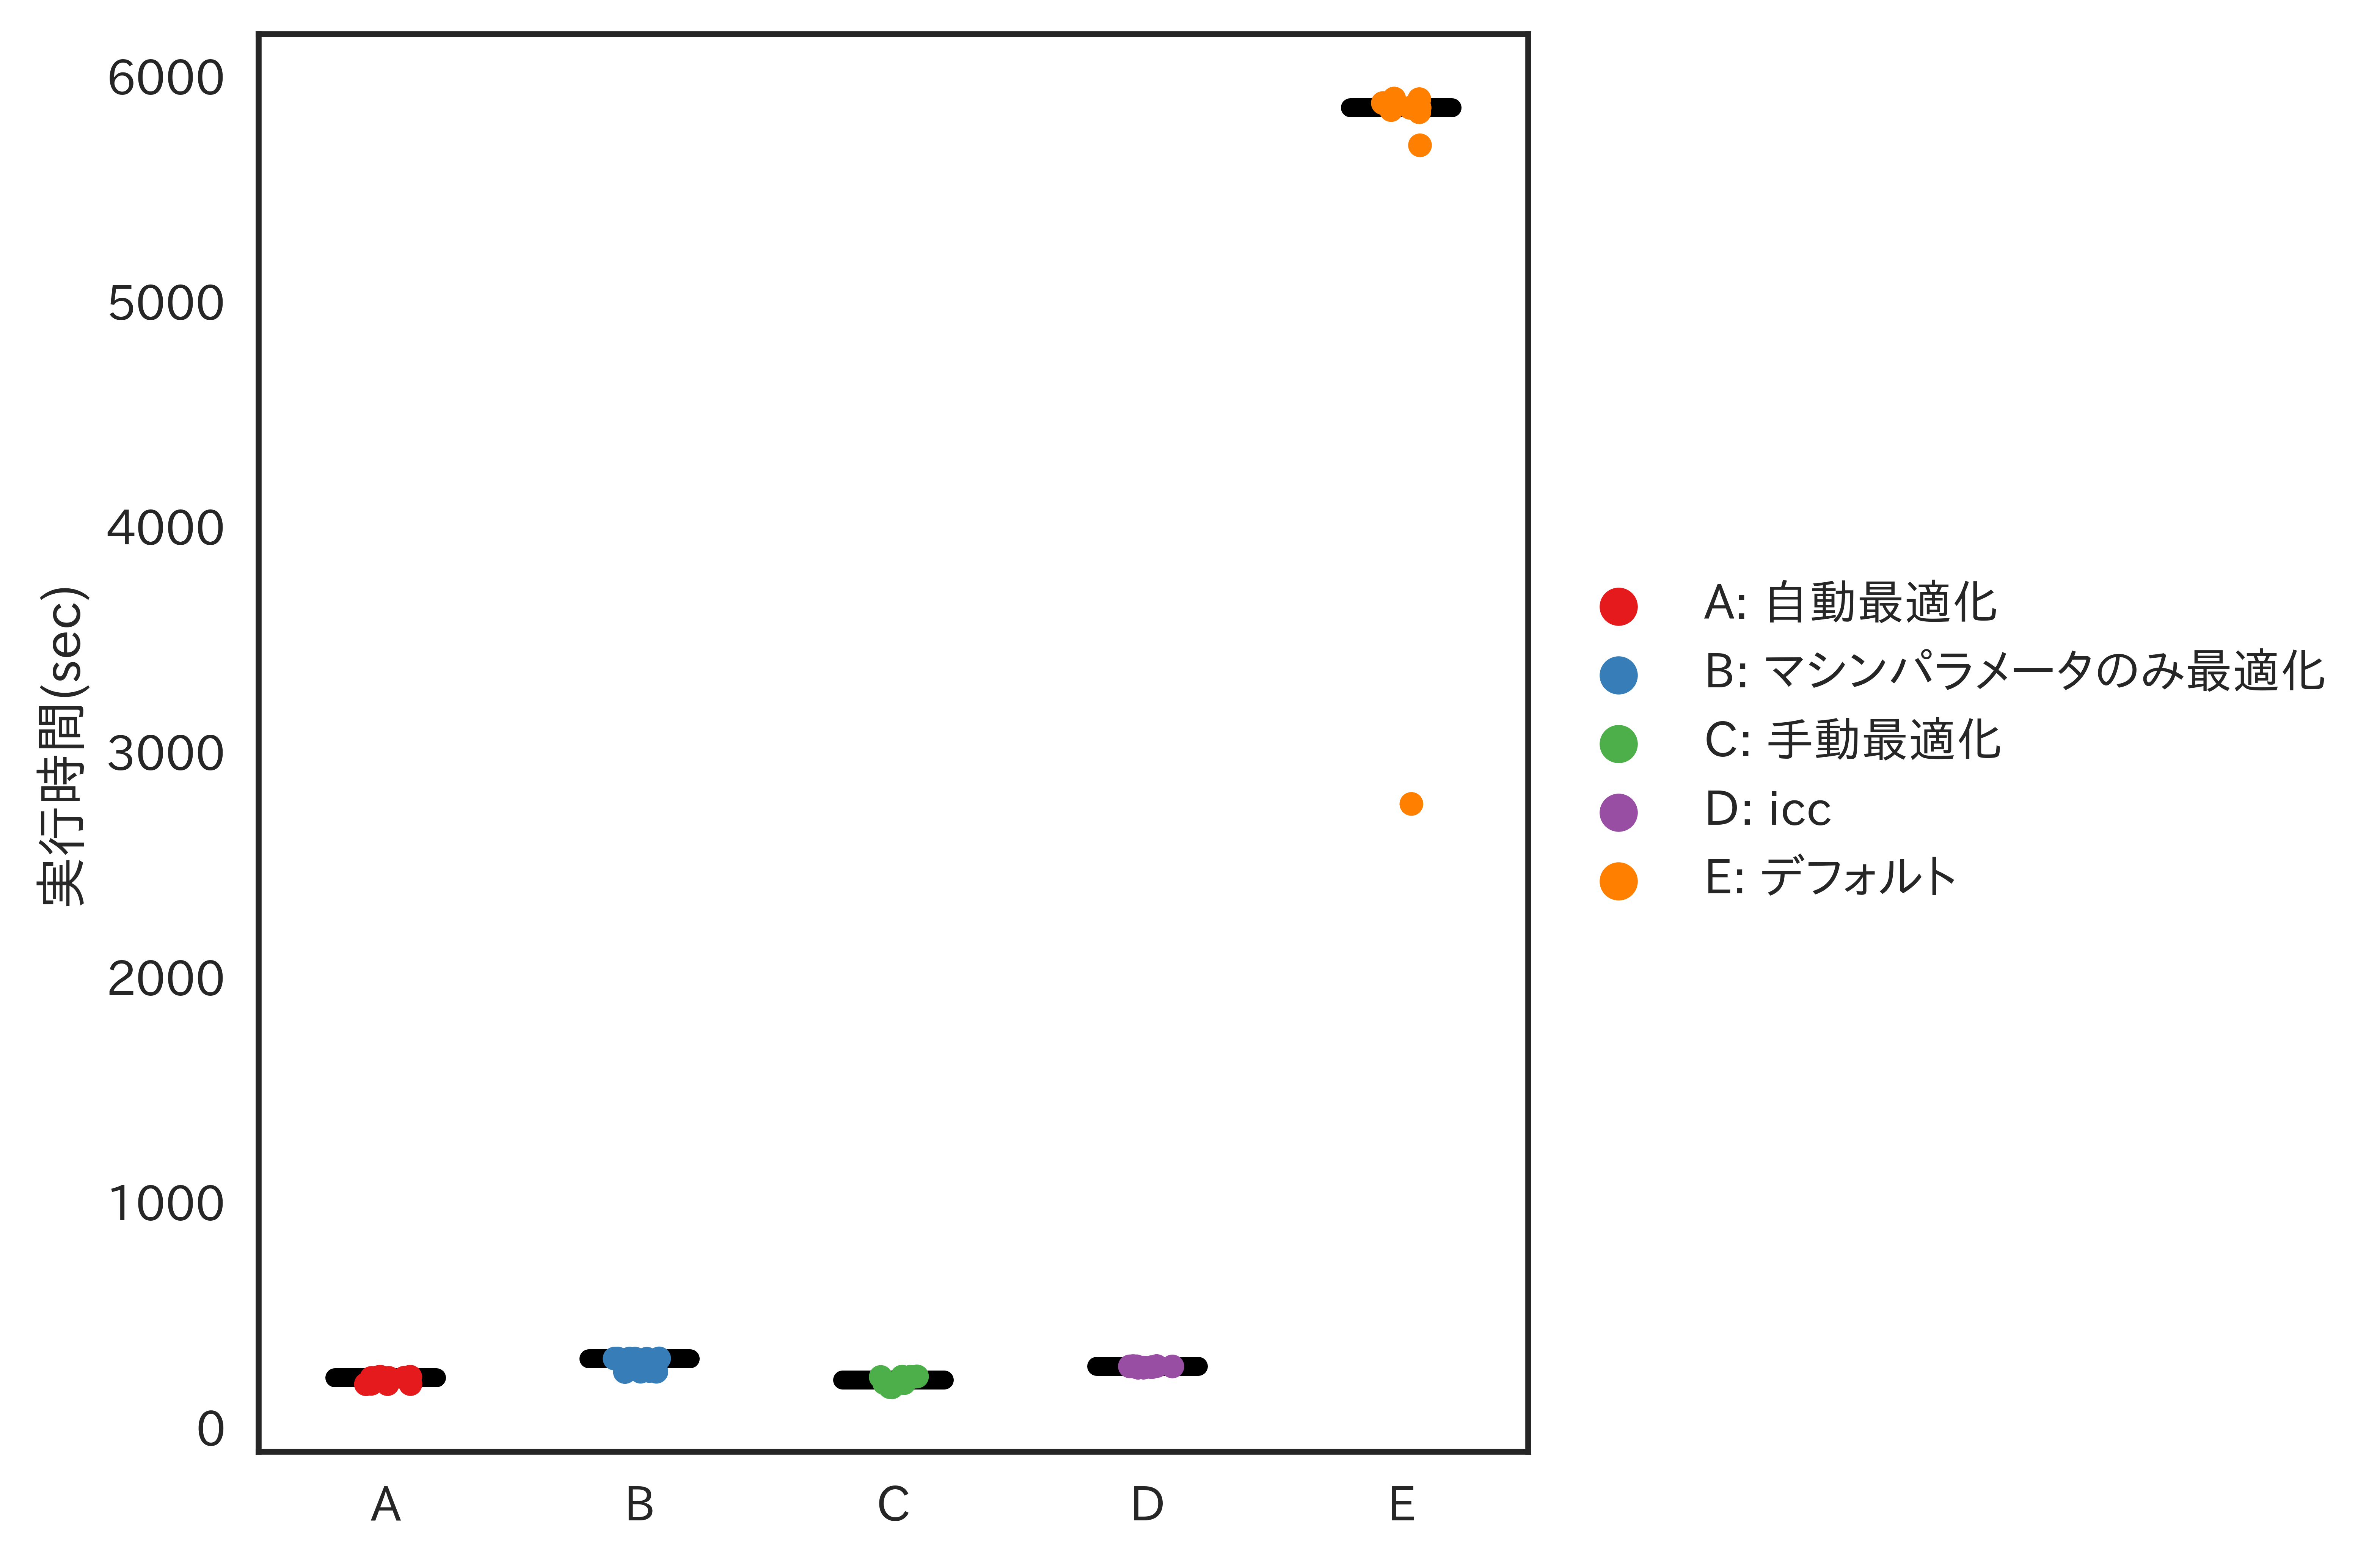

In [61]:
df_cluster = {
    "自動最適化": [220.992026, 192.518224, 194.101569, 220.950808, 220.335424, 225.530369, 192.859105, 225.757215, 220.190401, 193.026961],
    "マシンパラメータのみ最適化": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
    "icc": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
    "デフォルト": [2769.389279, 5860.954495, 5841.403846, 5860.959548, 5850.891501, 5884.45570, 5882.077237, 5902.260200, 5899.499978, 5694.459678],
}
table = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "デフォルト": "E",
    "icc": "D"
}
d = scatter_med(df_cluster, table, "cluster-compare.pdf")
# boxplot(df_cluster, table, "cluster-compare.png", _range=5.0)

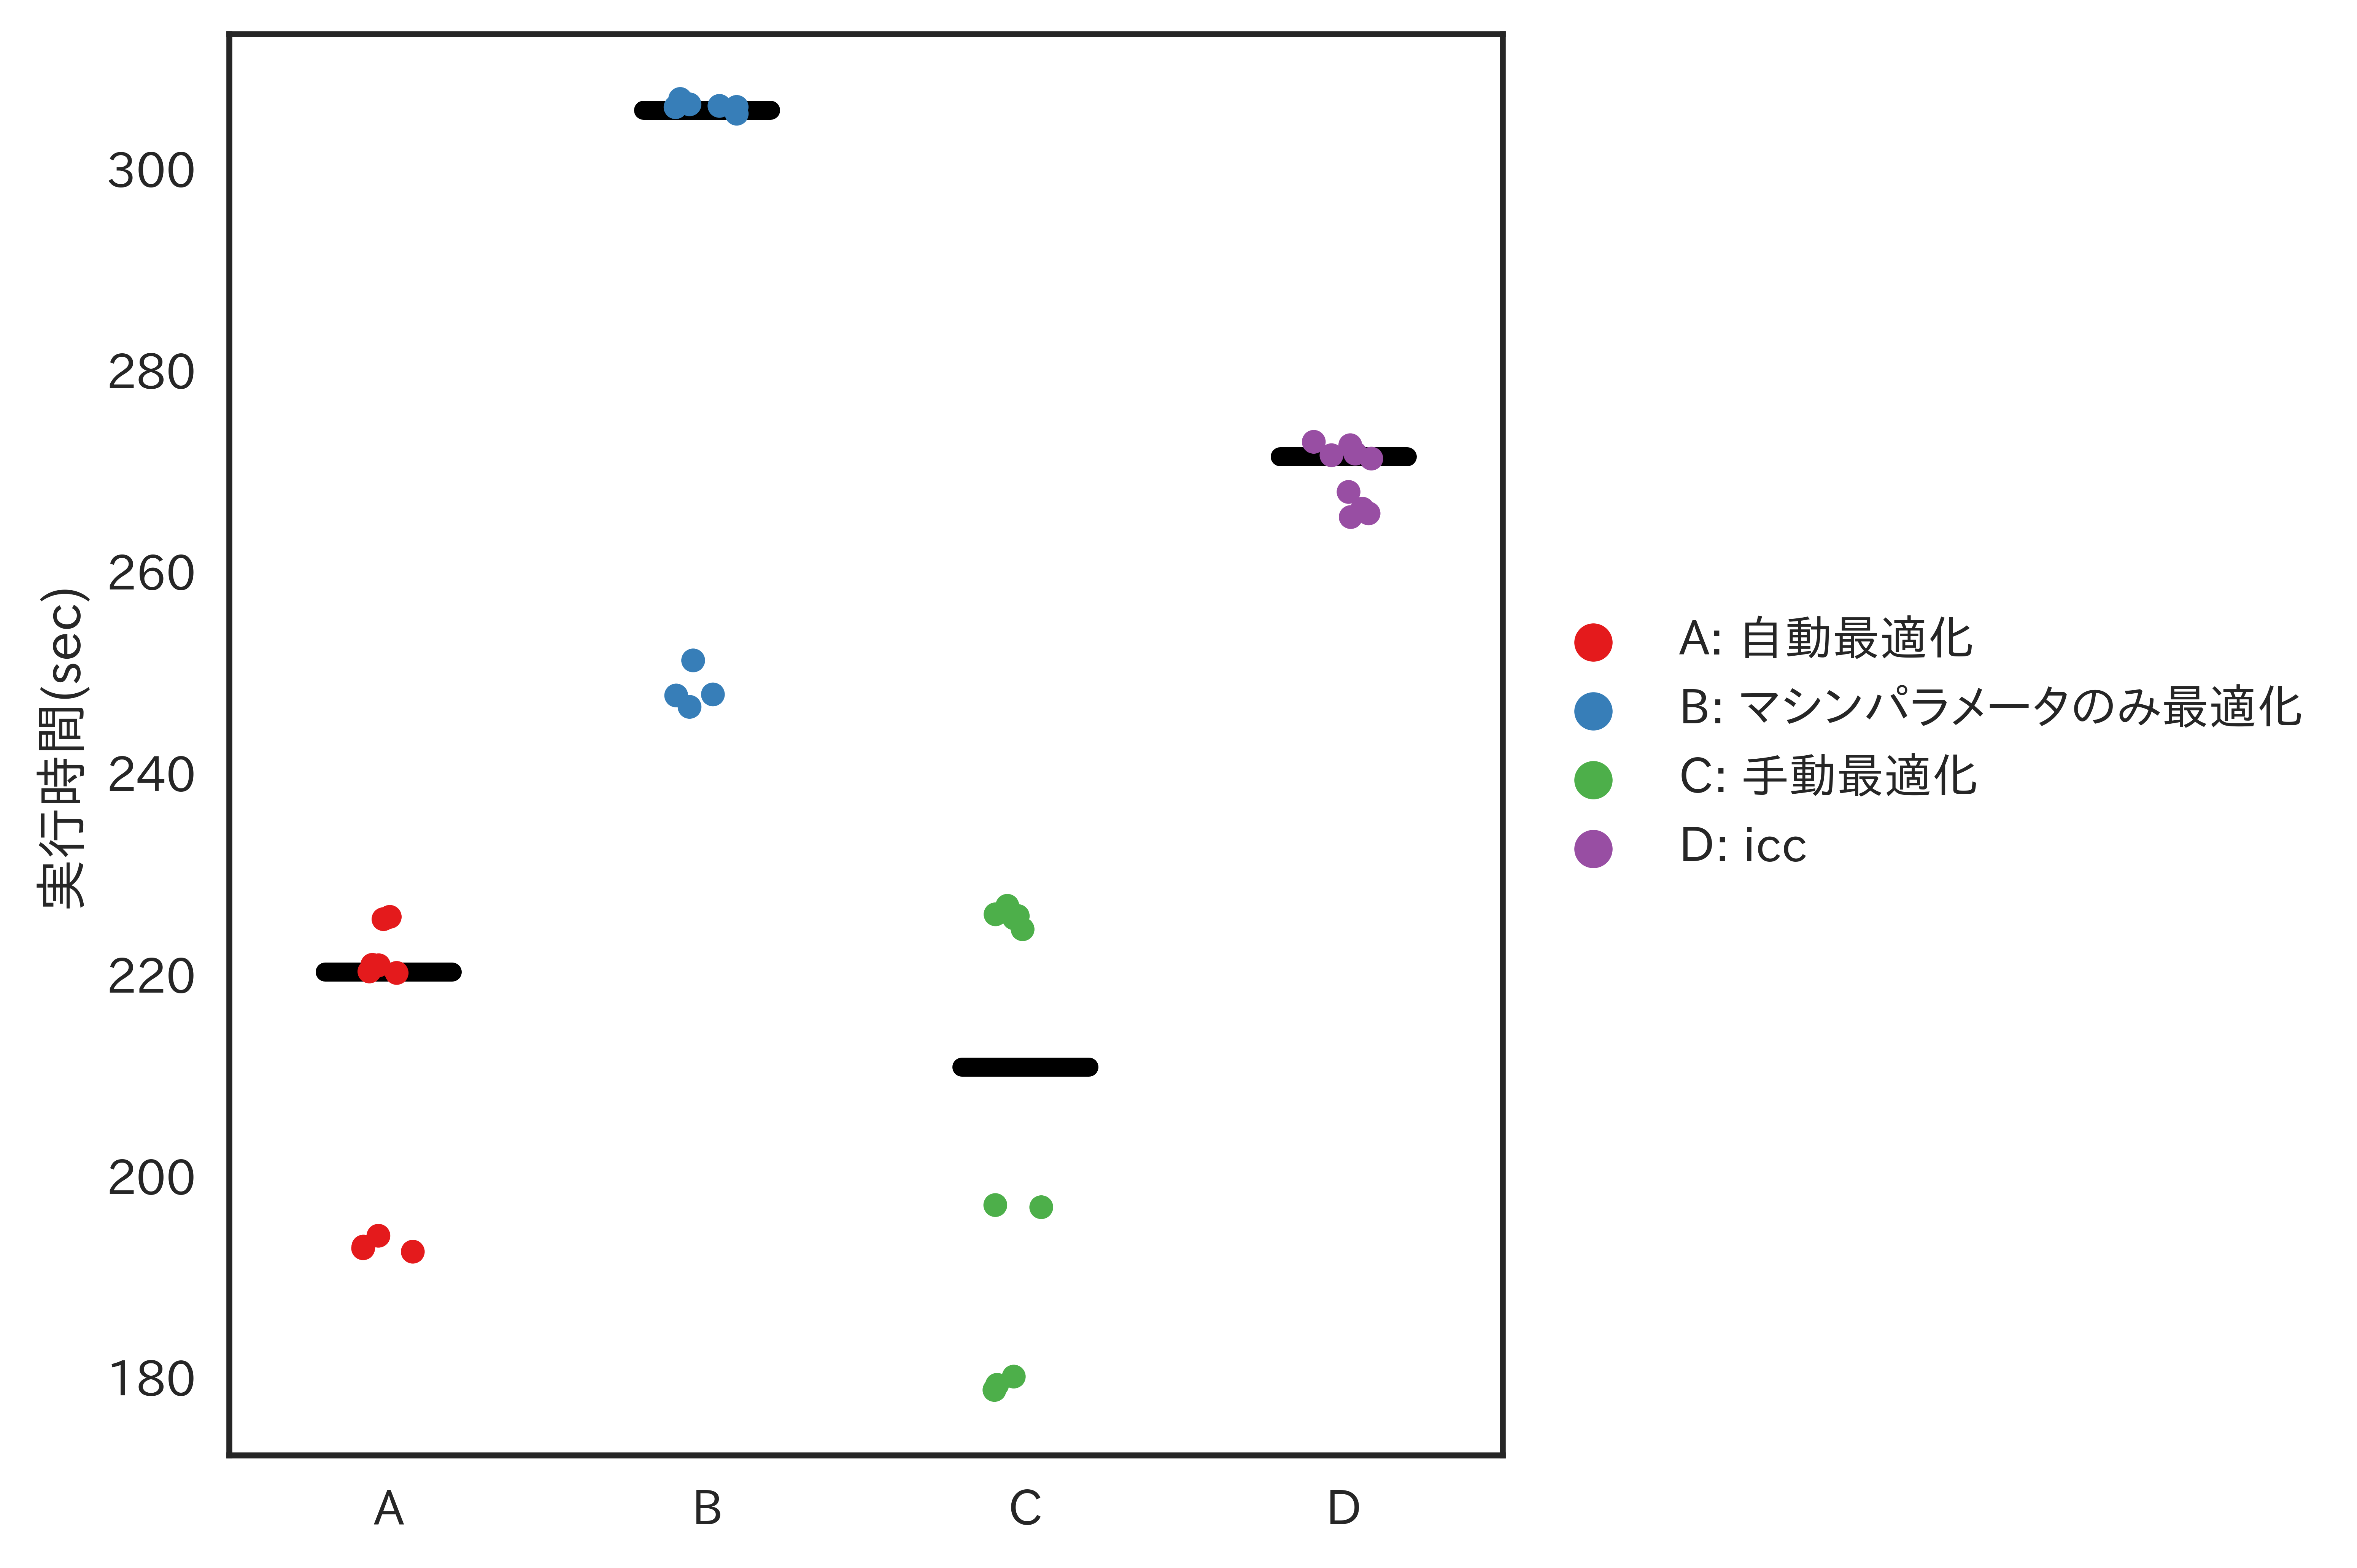

In [62]:
df_cluster2 = {
    "自動最適化": [220.992026, 192.518224, 194.101569, 220.950808, 220.335424, 225.530369, 192.859105, 225.757215, 220.190401, 193.026961],
    "マシンパラメータのみ最適化": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
    "icc": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
}
table2 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "icc": "D"
}
scatter_med(df_cluster2, table2, "cluster-compare-2.pdf")
# boxplot(df_cluster2, table2, "cluster-compare-2.png")

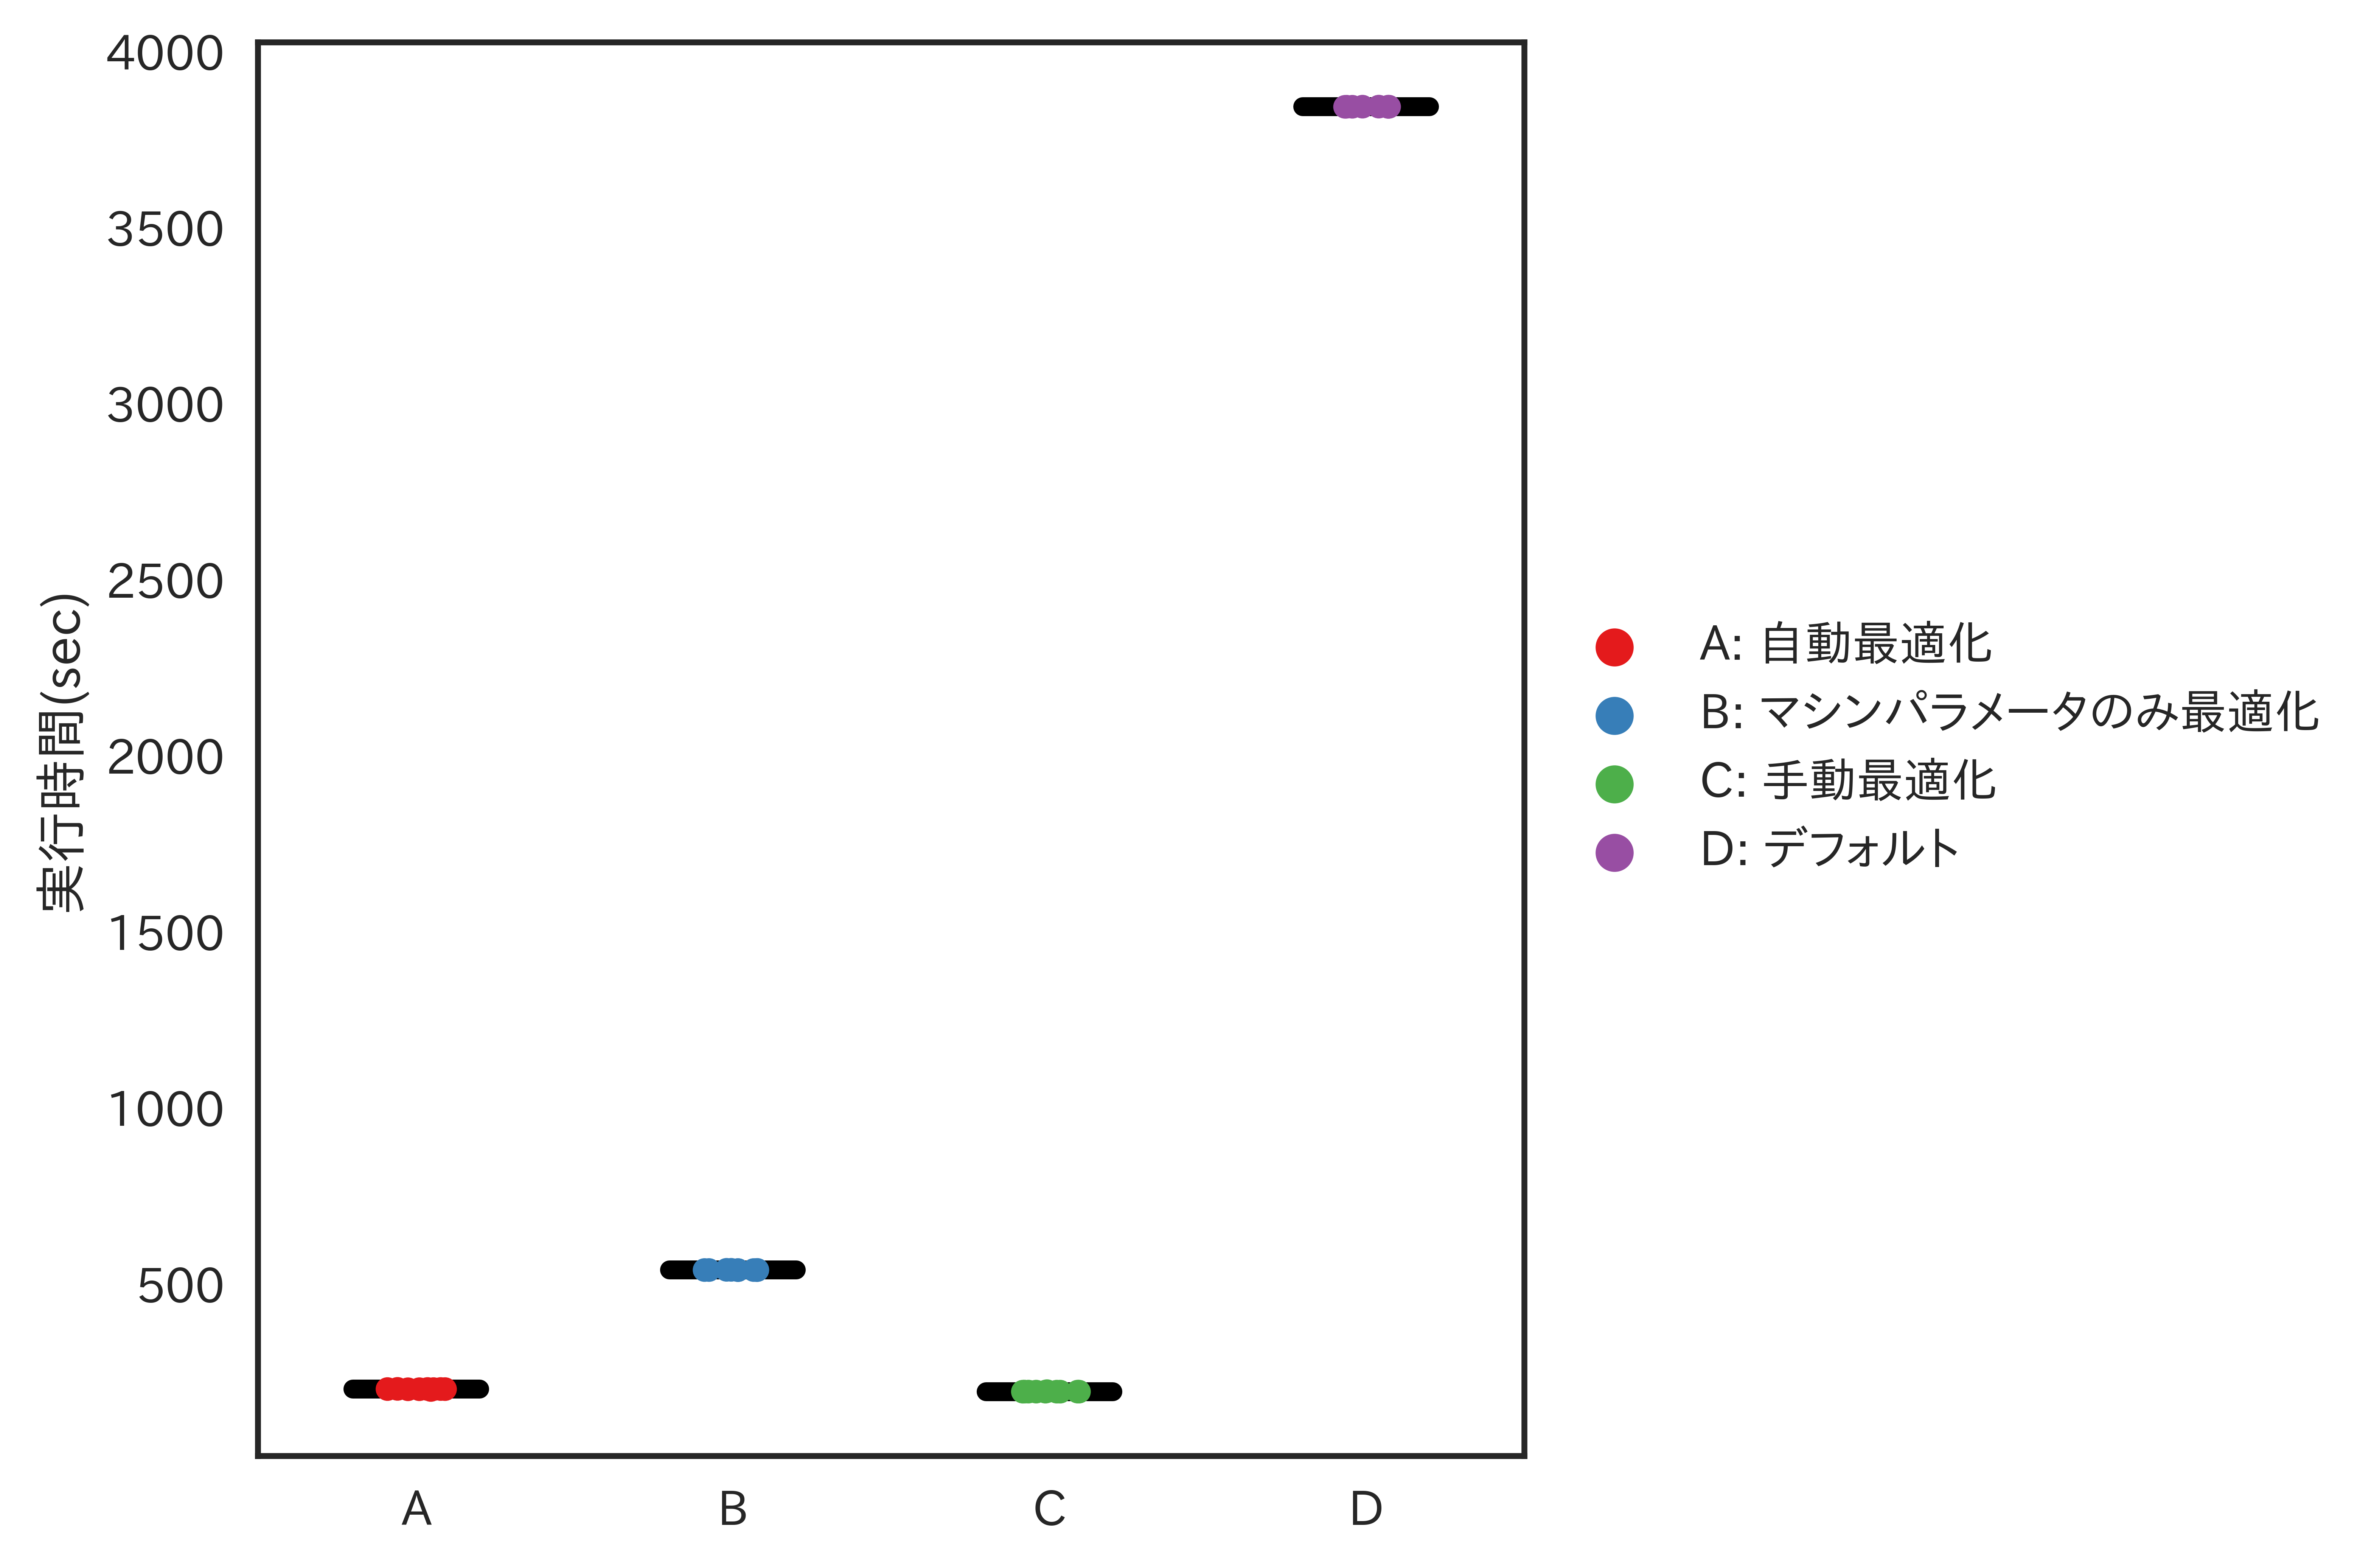

In [63]:
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "マシンパラメータのみ最適化": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
    "デフォルト": [3843.444054, 3843.728815, 3843.399342, 3843.391069, 3843.662798, 3843.337617, 3843.606756, 3843.164386, 3842.924506],
}
table3 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "デフォルト": "D",
}
# boxplot(df_k, table3, "k-compare.png")
scatter_med(df_k, table3, "k-compare.pdf")

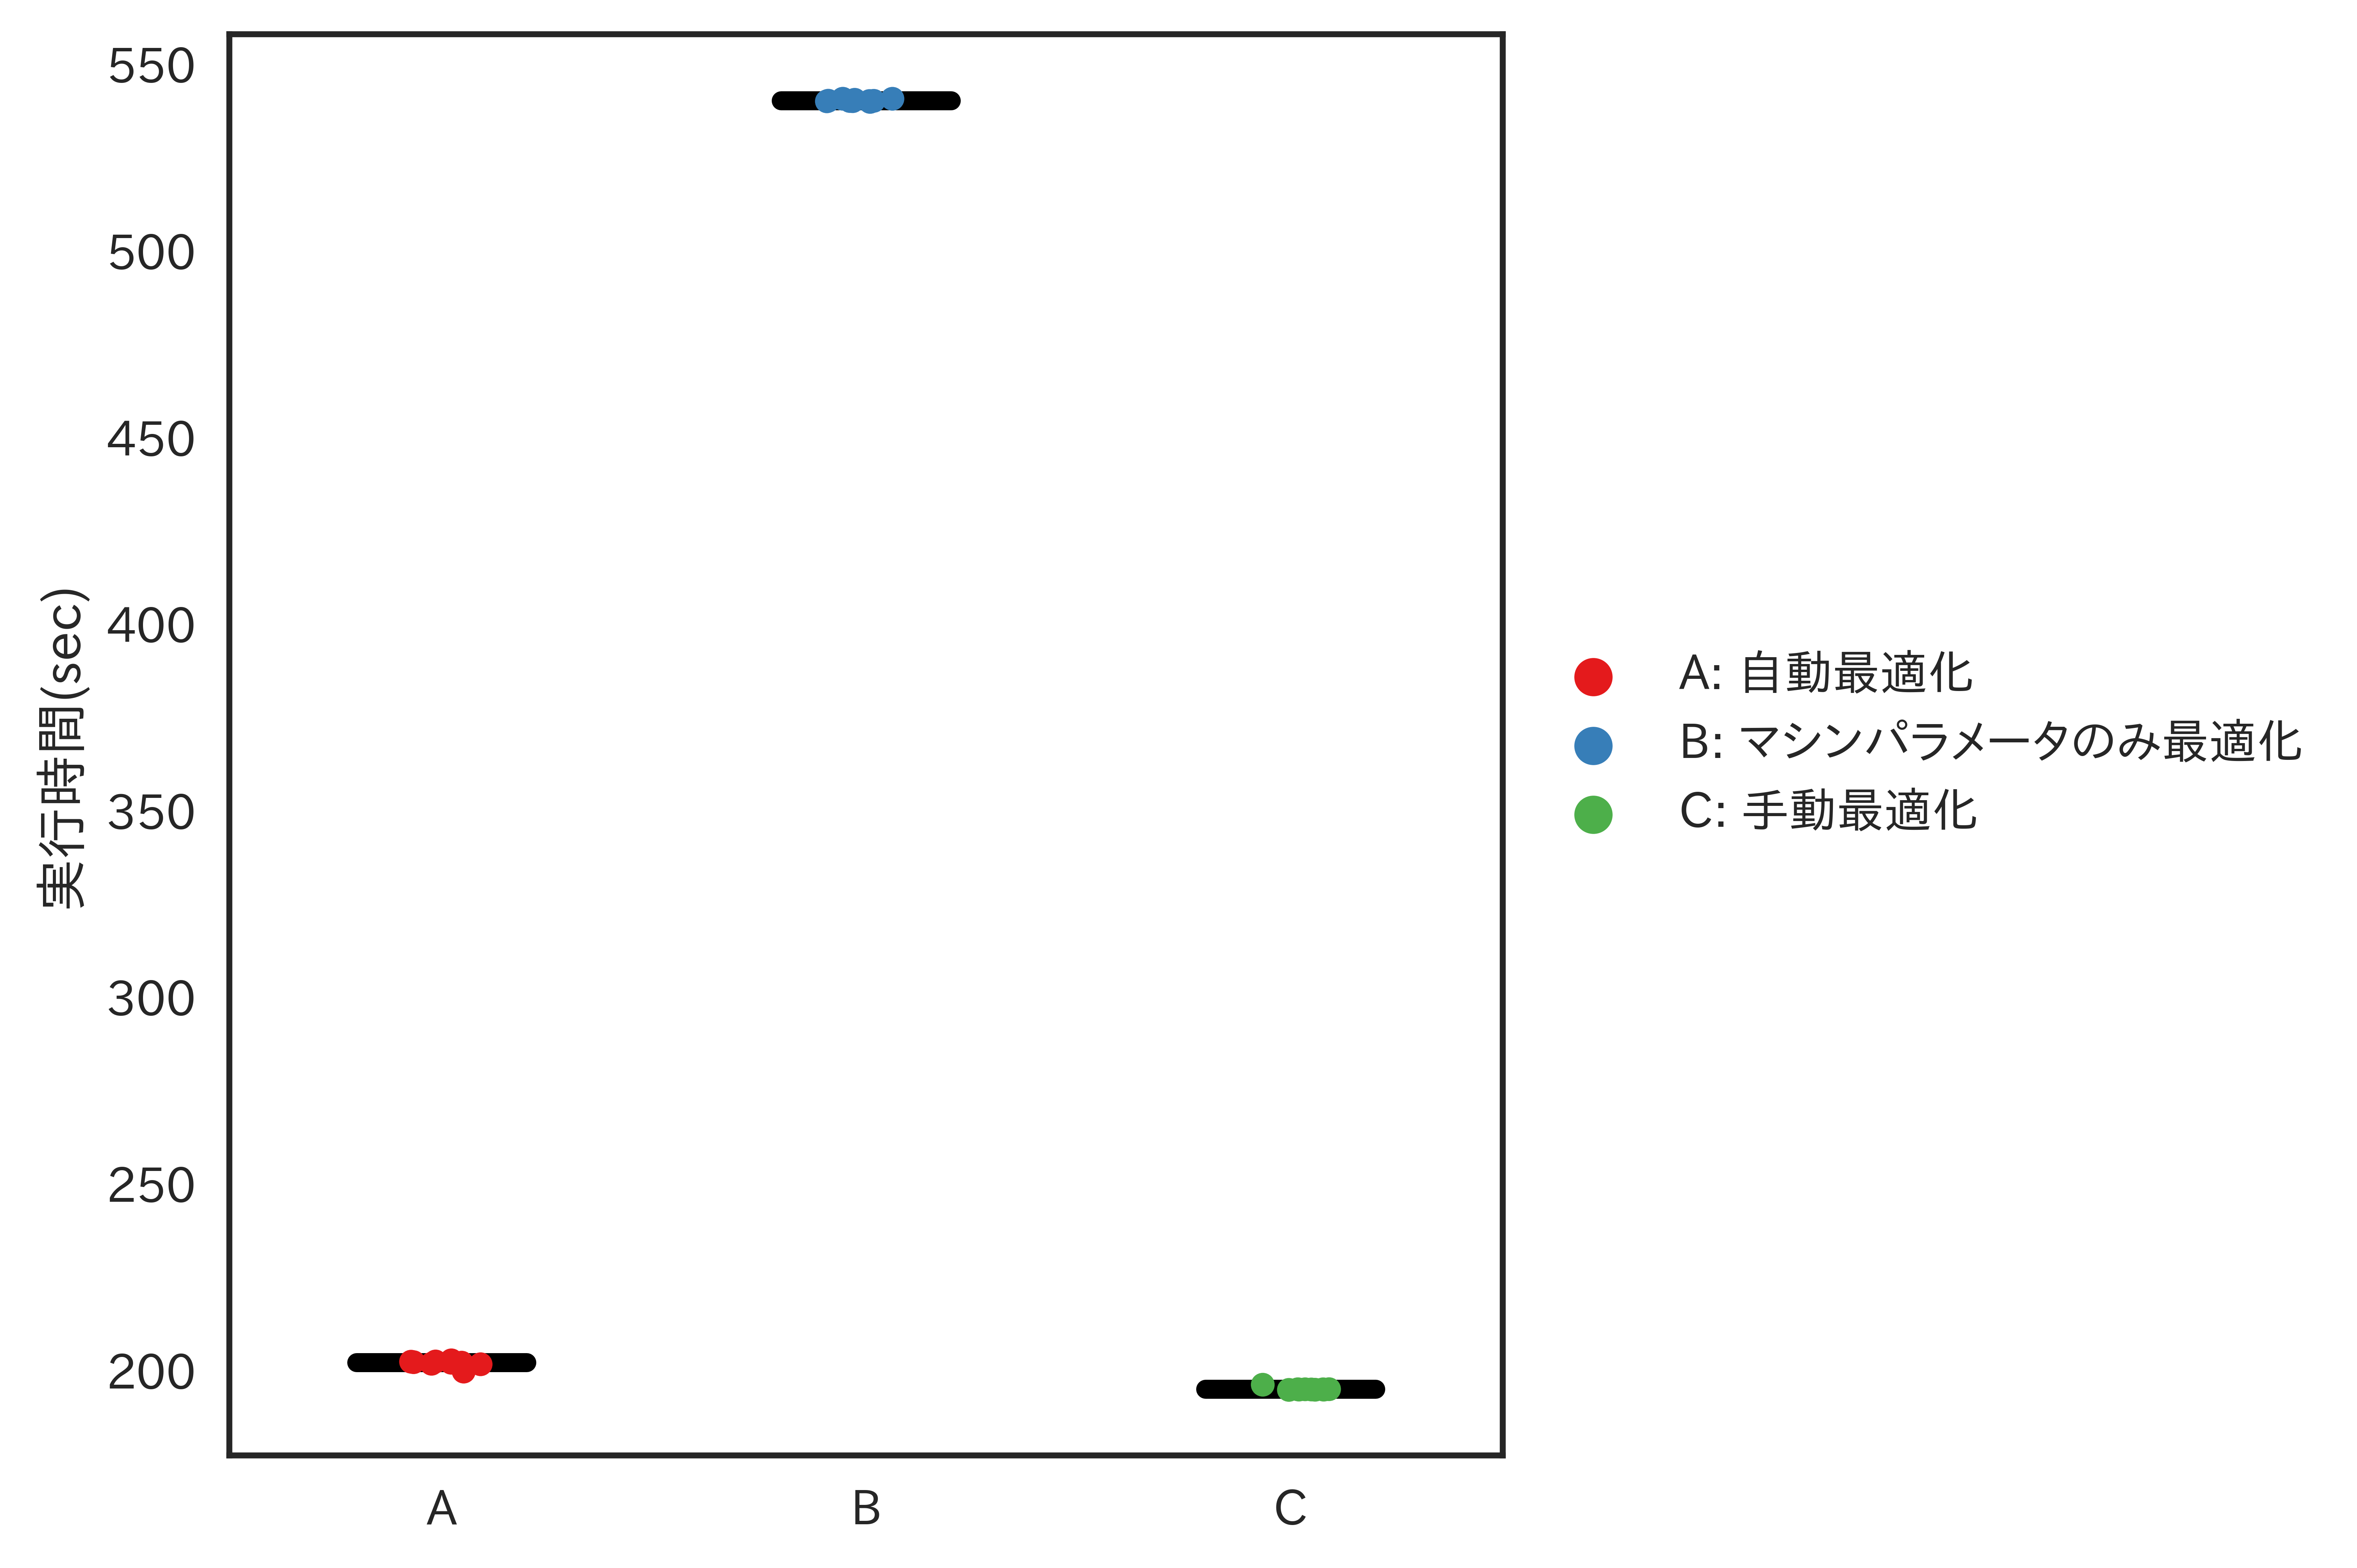

In [64]:
table4 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
}
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "マシンパラメータのみ最適化": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
scatter_med(df_k, table4, "k-compare-2.pdf")

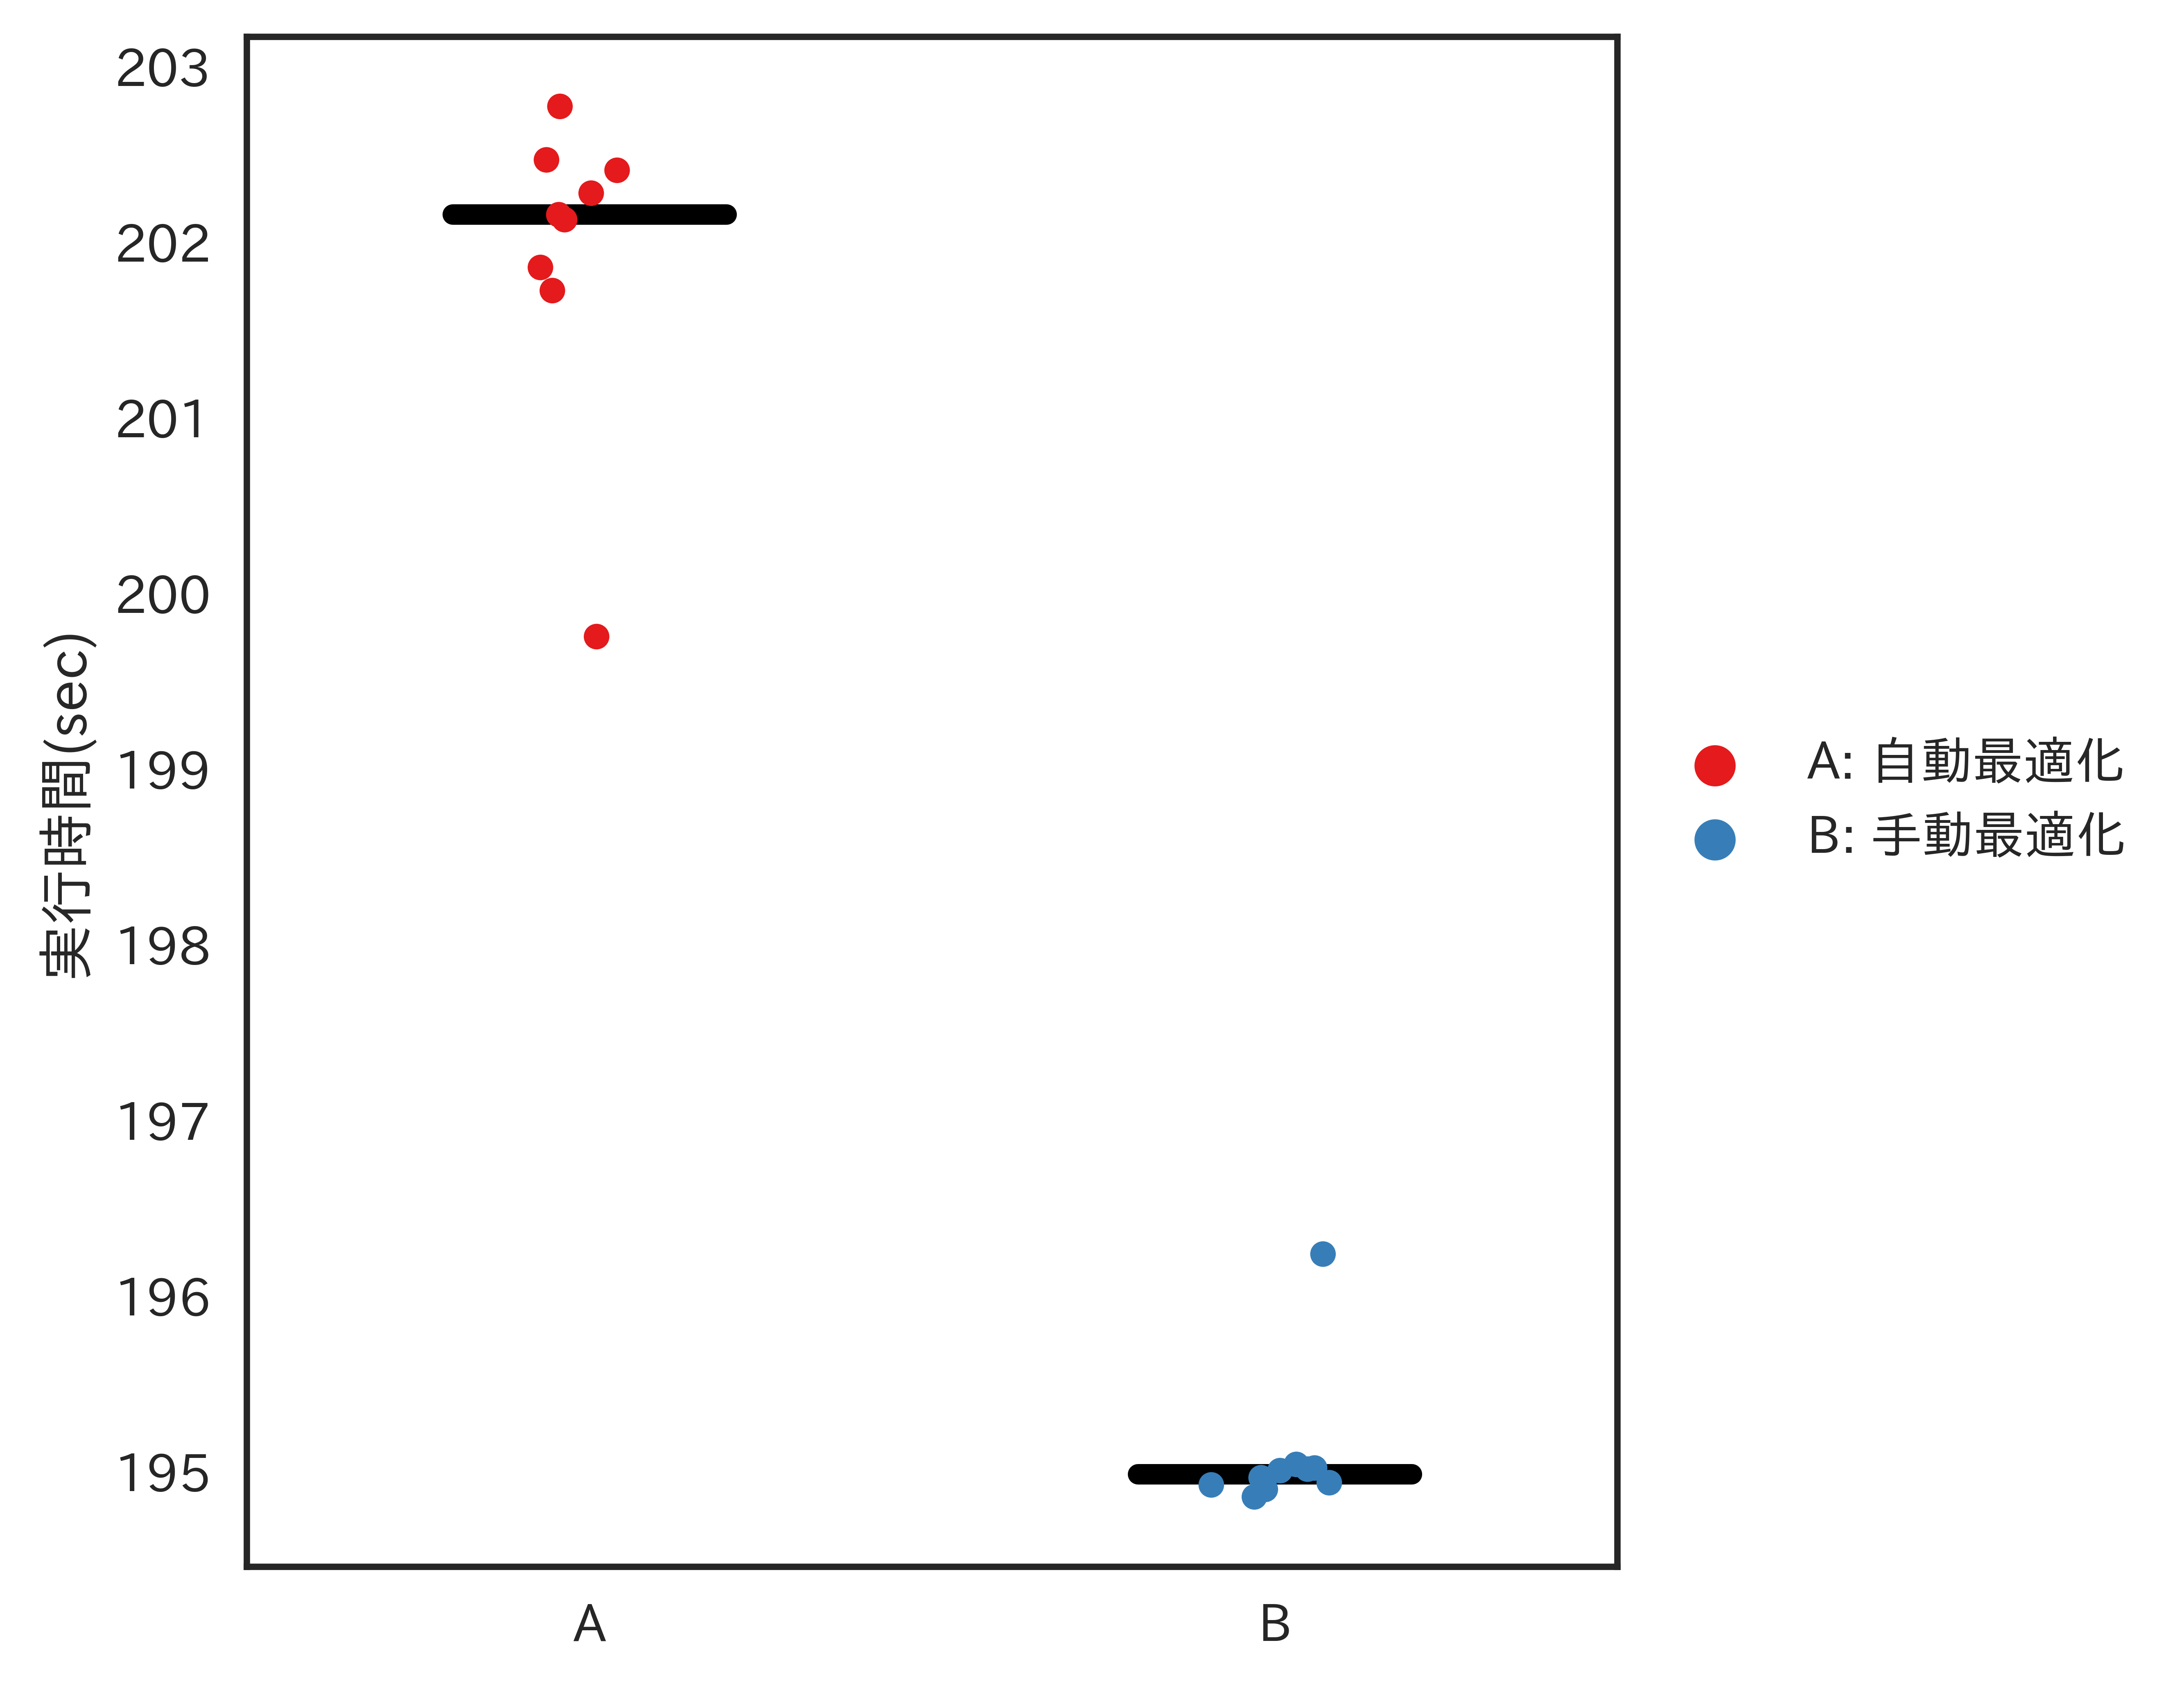

In [65]:
table5 = {
    "自動最適化": "A",
    "手動最適化": "B",
}
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
scatter_med(df_k, table5, "k-compare-3.pdf")

range
Label property of box 0 is A
Label property of box 1 is B
Label property of box 2 is C
Label property of box 3 is D


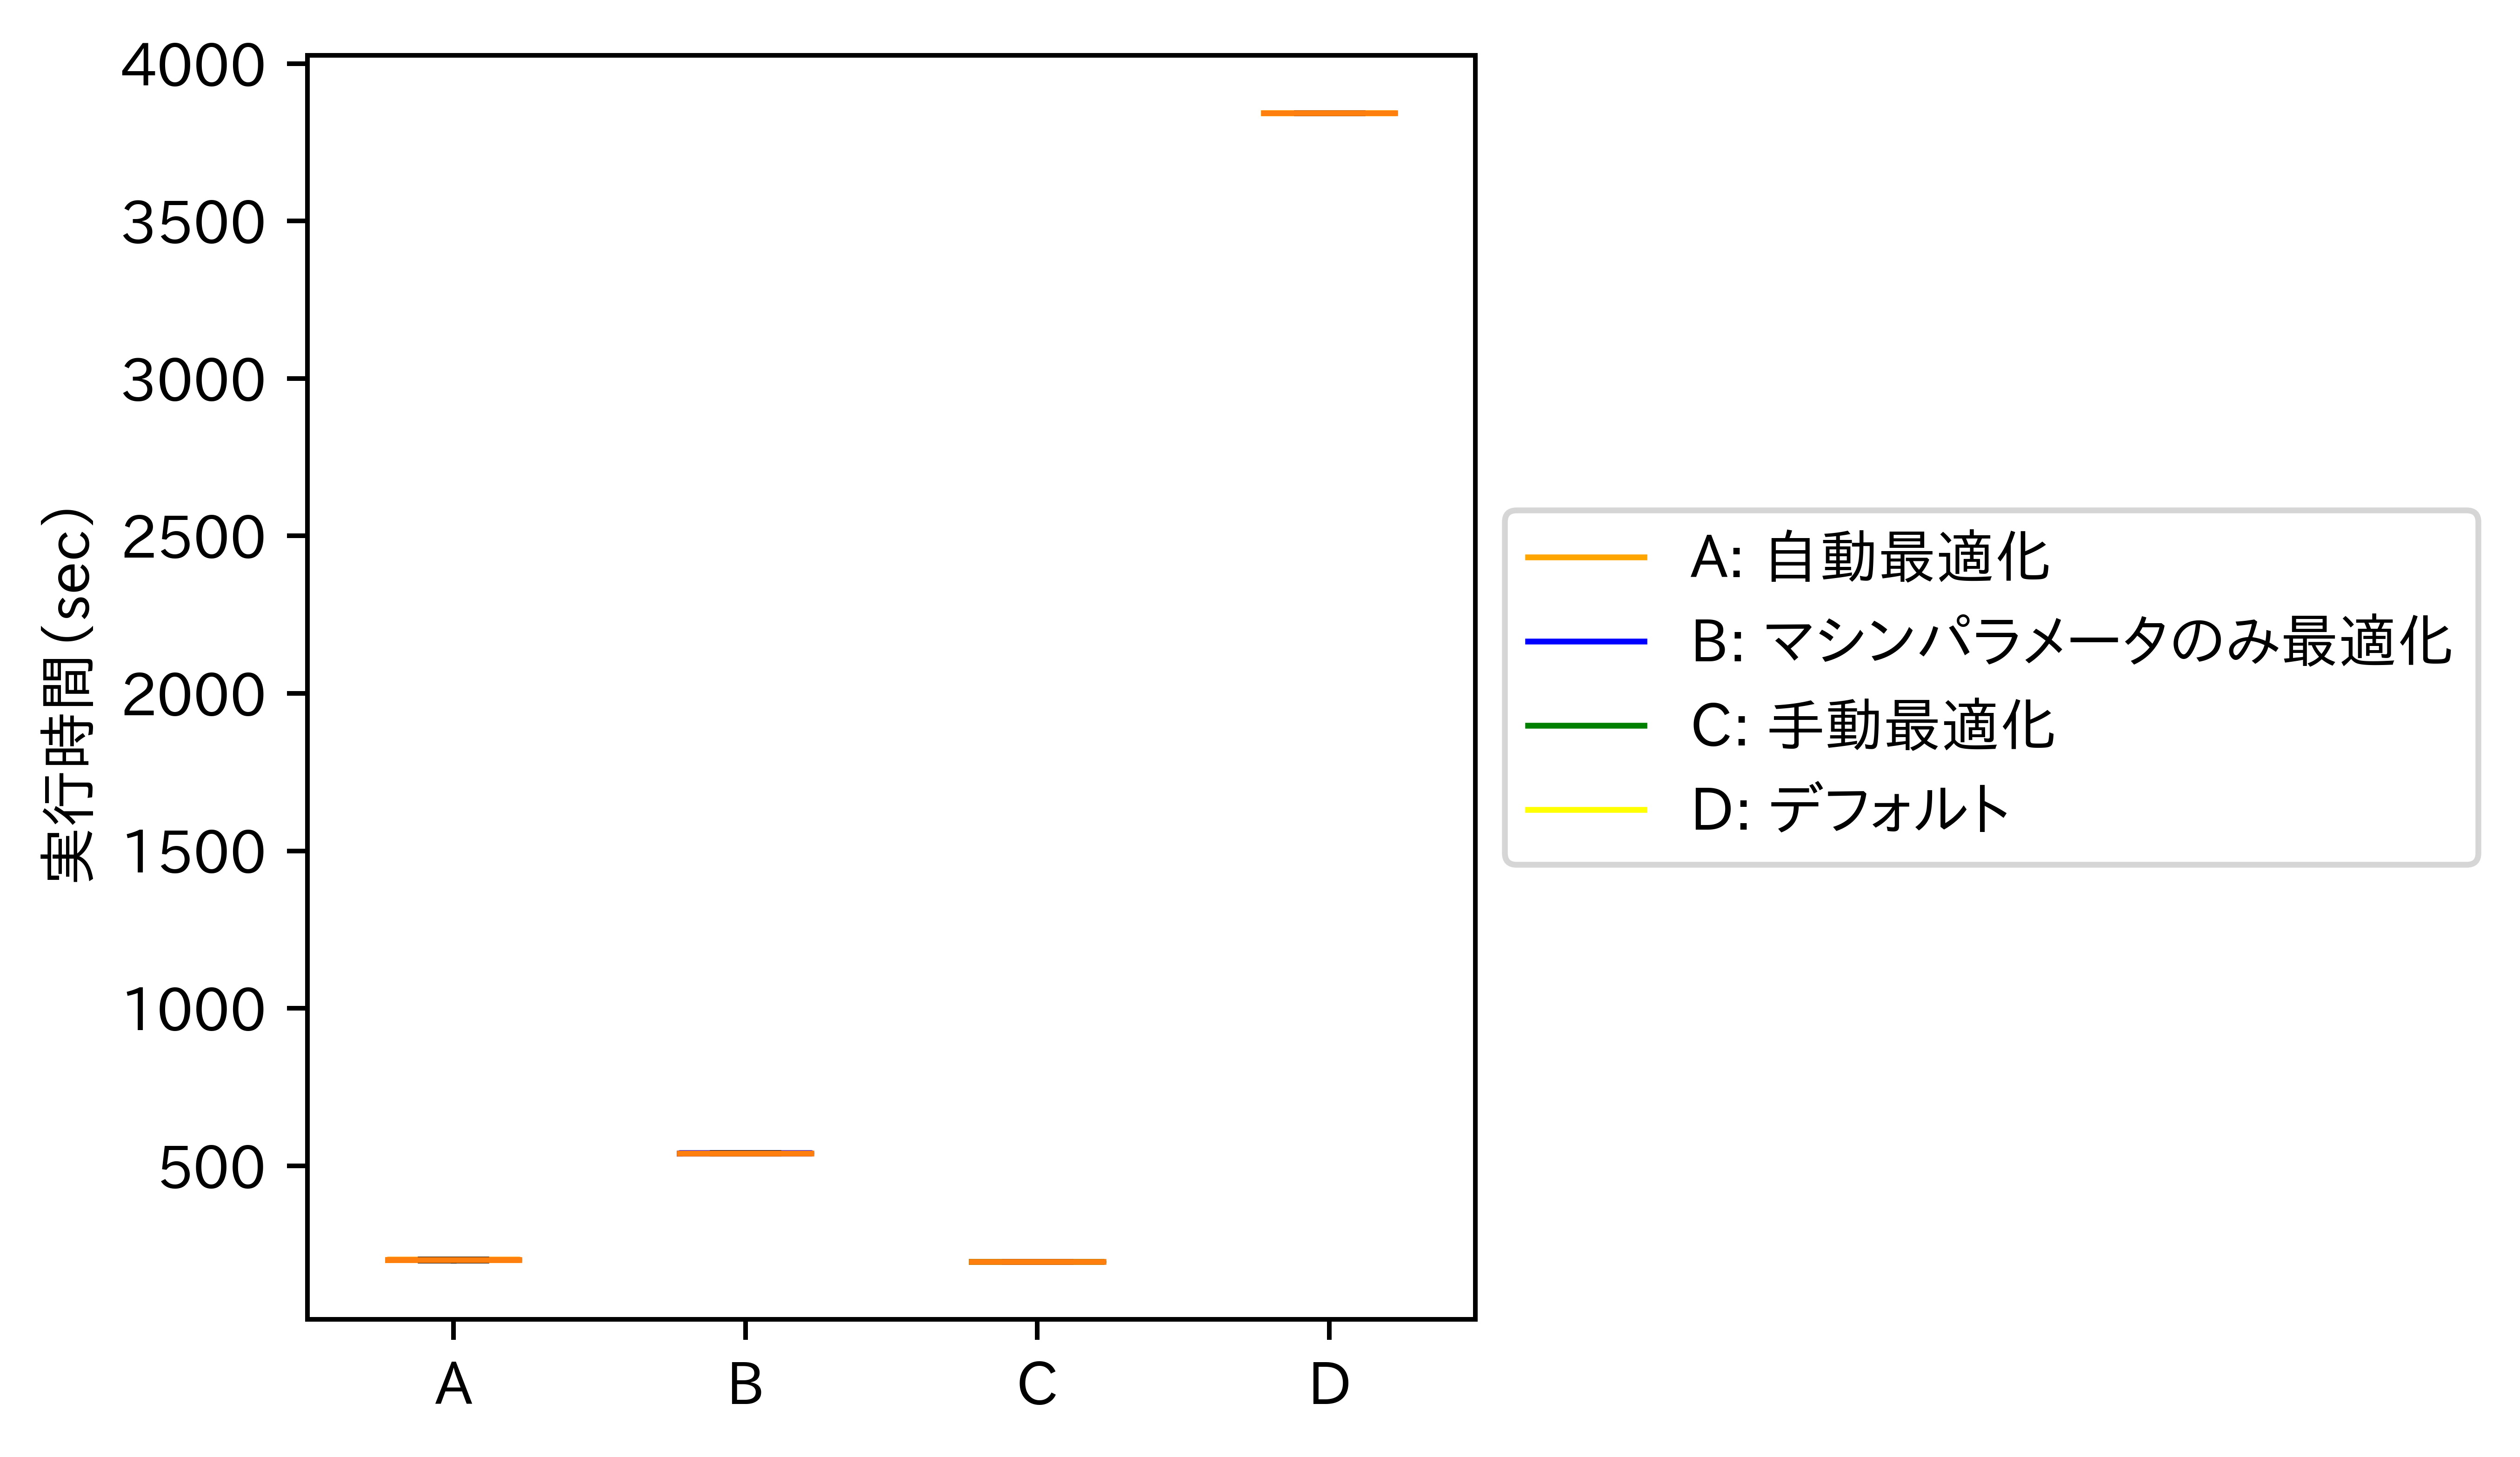

range
Label property of box 0 is A
Label property of box 1 is B
Label property of box 2 is C


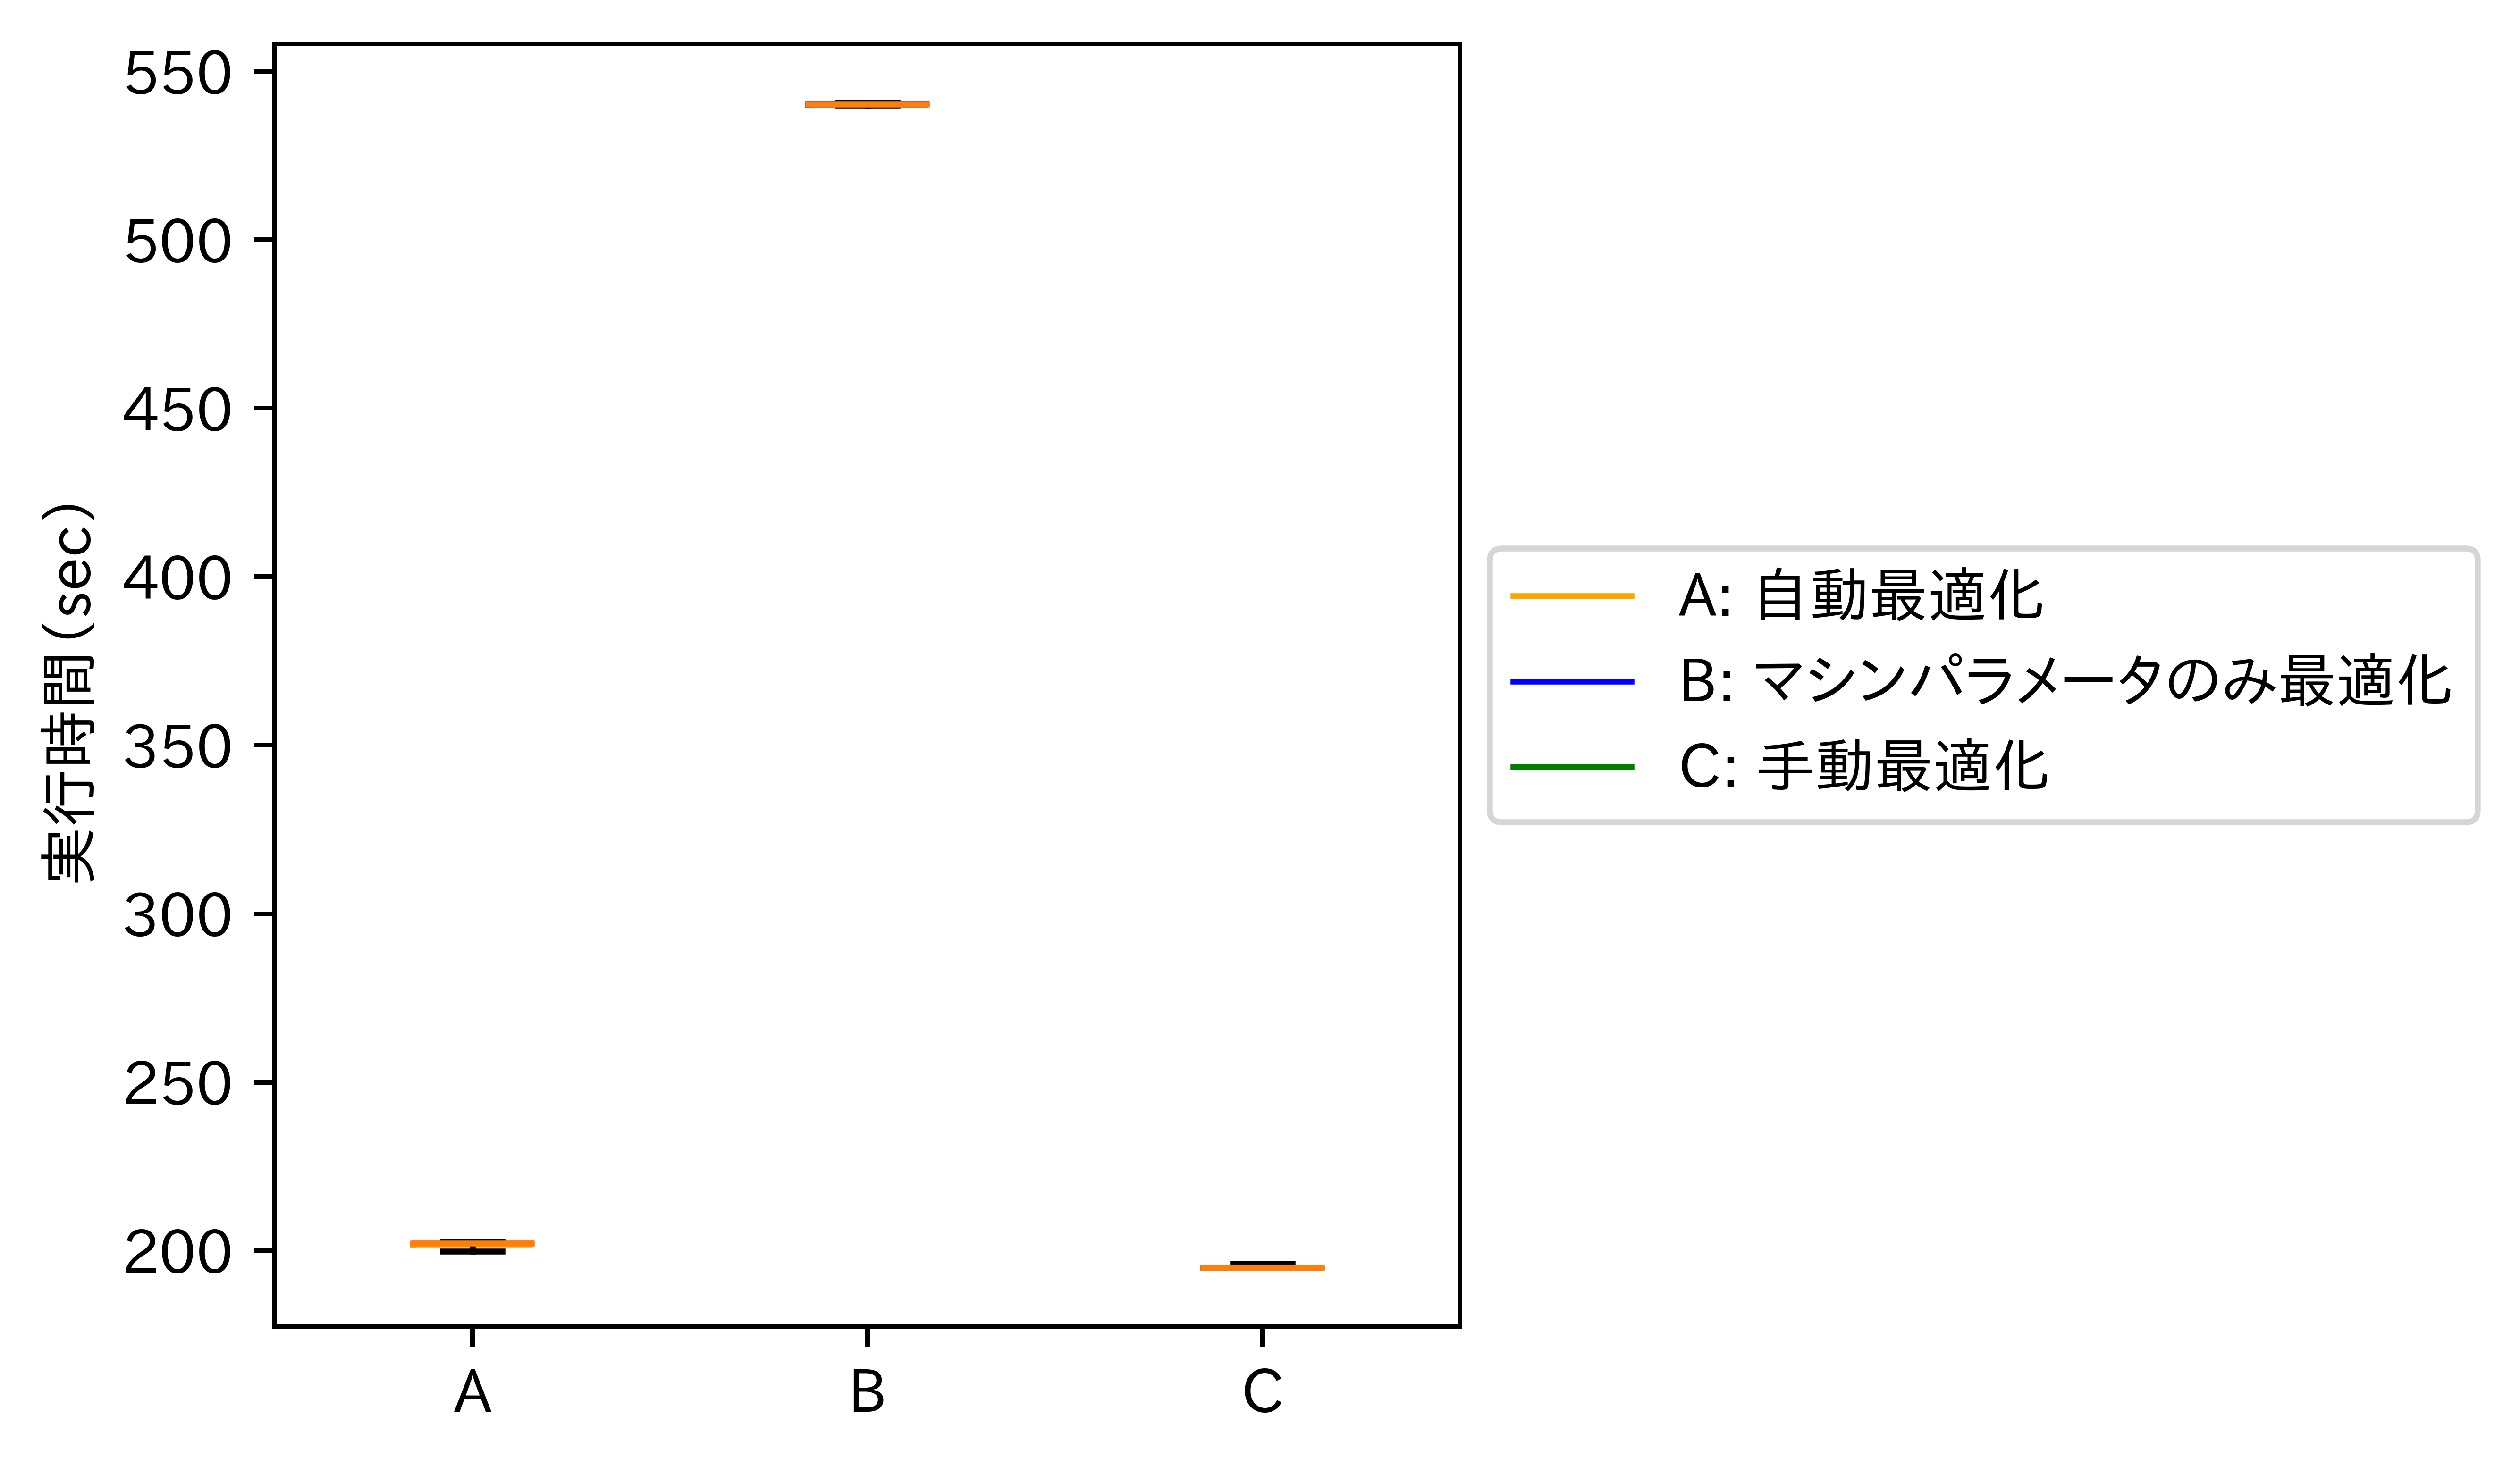

range
Label property of box 0 is A
Label property of box 1 is B


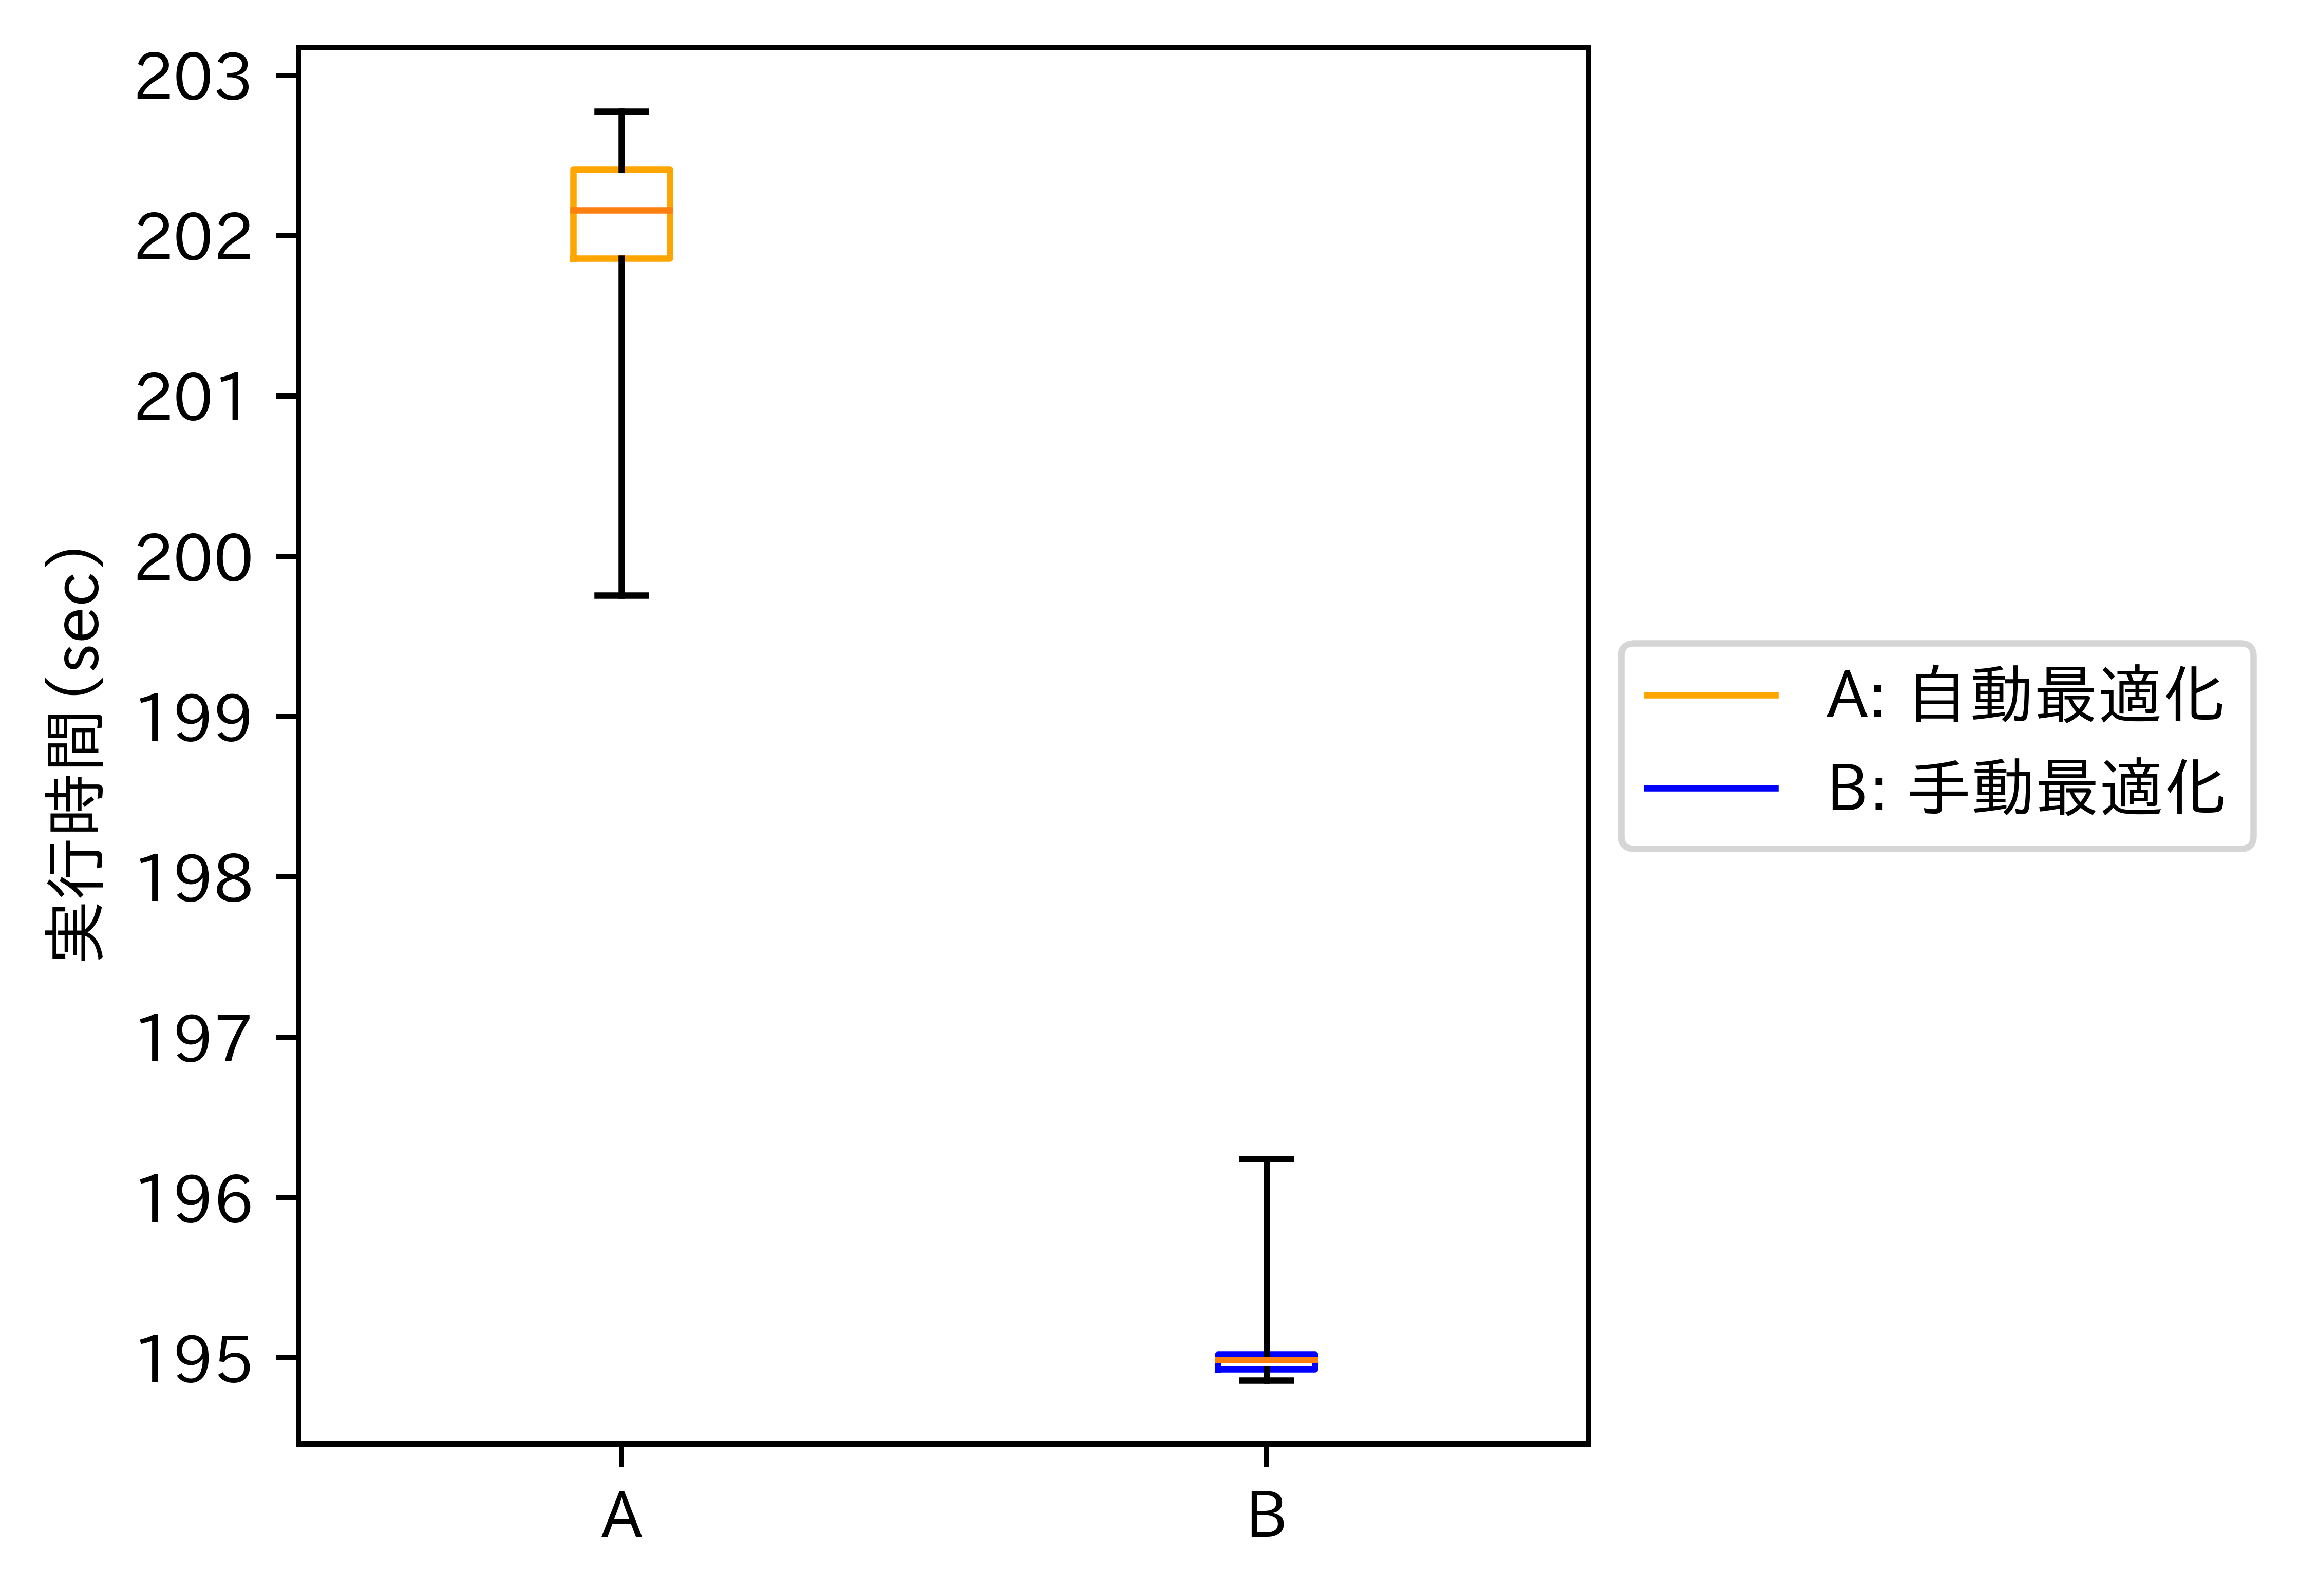

In [4]:
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "マシンパラメータのみ最適化": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
    "デフォルト": [3843.444054, 3843.728815, 3843.399342, 3843.391069, 3843.662798, 3843.337617, 3843.606756, 3843.164386, 3842.924506],
}
table3 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "デフォルト": "D",
}
boxplot(df_k, table3, "k-compare.png")

table4 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
}
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "マシンパラメータのみ最適化": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
boxplot(df_k, table4, "k-compare-2.png")

table5 = {
    "自動最適化": "A",
    "手動最適化": "B",
}
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
boxplot(df_k, table5, "k-compare-3.png")

In [15]:
def boxplot2(data1, data2, table, filename, _range='range'):
    d1 = []
    label1 = []
    d2 = []
    label2 = []
    for k in data1:
        d1.append(data1[k])
        label1.append(table[k])
    for k in data2:
        d2.append(data2[k])
        label2.append(table[k])

    fig, axes = plt.subplots(nrows=1, ncols=2, dpi=900)
    boxplot_dict1 = axes[0].boxplot(d1, whis=_range)
    boxplot_dict2 = axes[1].boxplot(d2, whis=_range)
    axes[0].set_xticklabels(label1)
    axes[1].set_xticklabels(label2)
    
    color_dict = {'A':'orange', 'B':'blue', 'C':'green', 'D': 'yellow', 'E': 'RED', 'X': 'black'}
    i=0
    label = []
    for b in boxplot_dict1['boxes']:
        lab = axes[0].get_xticklabels()[i].get_text()
        print("Label property of box {0} is {1}".format(i, lab))
        b.set_color(color_dict[lab])
        for k in data1:
            if table[k] == lab:
                b.set_label("{0}: {1}".format(lab, k))
                label.append("{0}: {1}".format(lab, k))
        i += 1
    i = 0
    for b in boxplot_dict2['boxes']:
        lab = axes[1].get_xticklabels()[i].get_text()
        print("Label property of box {0} is {1}".format(i, lab))
        b.set_color(color_dict[lab])
        for k in data2:
            if table[k] == lab:
                b.set_label("{0}: {1}".format(lab, k))
        i += 1
    axes[0].set_ylabel("実行時間（sec）")
    axes[0].set_title("クラスタ", fontsize=18)
    axes[1].set_title("京", fontsize=18)
#     axes[1].set_ylabel("実行時間（sec）")
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
    fig.legend(tuple(boxplot_dict1['boxes']), label, 'center right', borderaxespad=0.05, fontsize=10)
    plt.subplots_adjust(right=0.85)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

In [16]:
import seaborn as sns
# sns.set_style(style="white")
sns.set(font='IPAPGothic', style="white")
def scatter_med2(data1, data2, table1, table2, filename):
    label1 = []
    label2 = []
    xtick1 = []
    xtick2 = []
    value1 = []
    value2 = []
    for k in data1:
        for v in data1[k]:
            value1.append(v)
            label1.append("{0}: {1}".format(table1[k], k))
        xtick1.append(table1[k])
    for k in data2:
        for v in data2[k]:
            value2.append(v)
            label2.append("{0}: {1}".format(table2[k], k))
        xtick2.append(table2[k])
    df1 = pd.DataFrame({
        "category": label1,
        "実行時間(sec)": value1
    })
    df2 = pd.DataFrame({
        "category": label2,
        "実行時間(sec)": value2
    })
    meds1 = []
    meds2 = []
    for k in data1:
        med = df1.loc[df1["category"] == "{0}: {1}".format(table1[k], k)].median()['実行時間(sec)']
        meds1.append(med)
    for k in data2:
        med = df2.loc[df2["category"] == "{0}: {1}".format(table2[k], k)].median()['実行時間(sec)']
        meds2.append(med)
    median_width = 0.4

    fig, axes = plt.subplots(nrows=1, ncols=2, dpi=900)
    sns.stripplot(x="category", y="実行時間(sec)", edgecolor="none", hue="category", palette="Set1", data=df1, jitter=True, ax=axes[0])
    sns.stripplot(x="category", y="実行時間(sec)", edgecolor="none", hue="category", palette="Set1", data=df2, jitter=True, ax=axes[1])
    for tick, text in zip(axes[0].get_xticks(), axes[0].get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df1[df1['category']==sample_name]['実行時間(sec)'].median()

        # plot horizontal lines across the column, centered on the tick
        axes[0].plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')
    for tick, text in zip(axes[1].get_xticks(), axes[1].get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"

        # calculate the median value for all replicates of either X or Y
        median_val = df2[df2['category']==sample_name]['実行時間(sec)'].median()

        # plot horizontal lines across the column, centered on the tick
        axes[1].plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')
    axes[0].set_xlabel('')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
#     axes[0].set_title('クラスタ')
#     axes[1].set_title('京')
    axes[0].set_xticklabels(xtick1)
    axes[1].set_xticklabels(xtick2)
    h1, l1 = axes[0].get_legend_handles_labels()
    h2, l2 = axes[1].get_legend_handles_labels()
    axes[0].legend_.remove()
    axes[1].legend_.remove()
#     fig.legend(h1+h2, l1, loc="center right", bbox_to_anchor=(1, 0.5), fontsize=10, frameon=True)
#     fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
#     fig.subplots_adjust(right=0.85)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

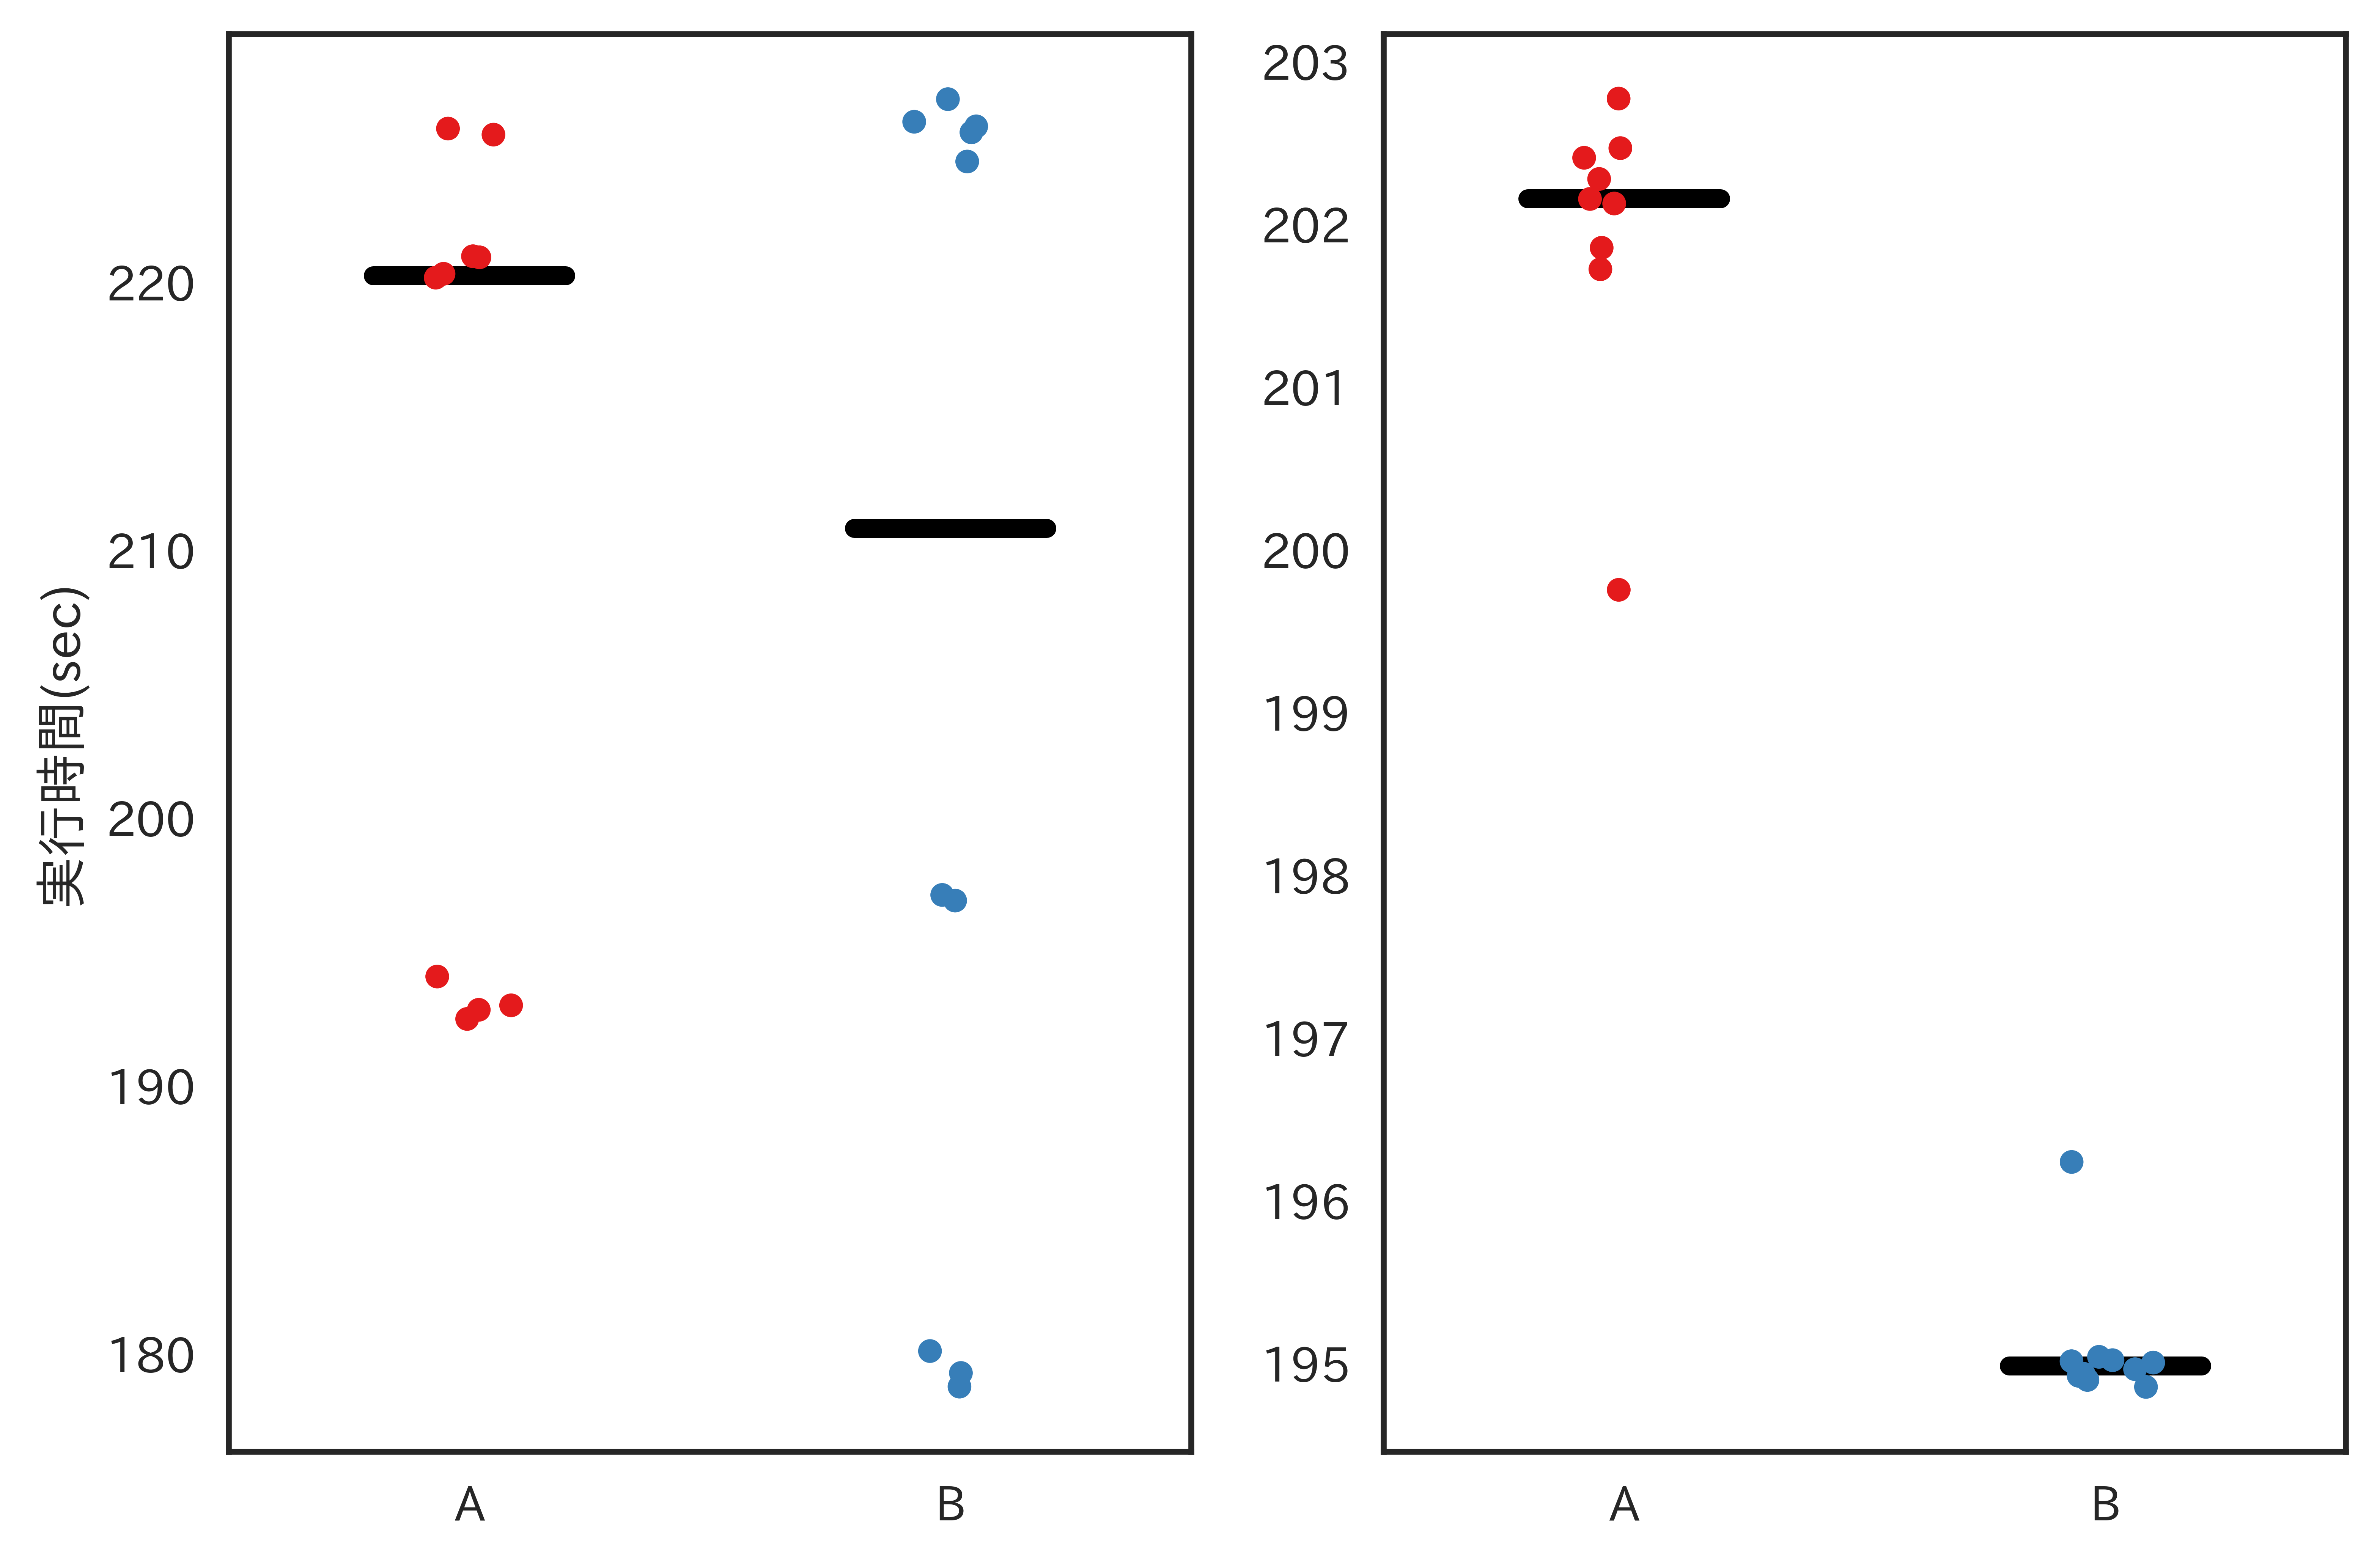

In [17]:
df_cluster = {
#     "最適化2": [195.48532, 206.052672, 192.95713600000002, 192.78956700000001, 194.115993, 192.78315700000002],
    "自動最適化": [220.992026, 192.518224, 194.101569, 220.950808, 220.335424, 225.530369, 192.859105, 225.757215, 220.190401, 193.026961],
#     "計算機パラメータ": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
#     "icc": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
}
table = {
#     "最適化2": "X",
    "自動最適化": "A",
#     "計算機パラメータ": "B",
    "手動最適化": "B",
#     "icc": "D"
}

df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
#     "計算機パラメータ": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
scatter_med2(df_cluster, df_k, table, table, "compare-abst-2.png")

In [6]:
df = pd.read_csv("cluster/data/2018-02-04_21-14/result_candidate.csv")
# df['time_avg'] = (df['time'] + df['time0'] + df['time1'] + df['time2'] + df['time3'] + df['time4']) / 6.0
# df = df.sort_values(by=["time_avg"]).reset_index(drop=True)
# time = df['time_avg'].values
data = []
for i in range(len(df)):
    data.append([df.loc[i]['time'], df.loc[i]['time0'], df.loc[i]['time1'], df.loc[i]['time2'], df.loc[i]['time3'], df.loc[i]['time4'], df.loc[i]['time5'], df.loc[i]['time6'], df.loc[i]['time7'], df.loc[i]['time8']])
data

[[236.84333900000001,
  246.152377,
  238.98176099999998,
  235.355063,
  239.81219700000003,
  237.49349799999999,
  239.76605899999998,
  248.269137,
  238.11174700000001,
  235.99454500000002],
 [195.97598200000002,
  198.13908899999998,
  196.24741900000001,
  196.05426699999998,
  196.43974399999999,
  196.21767299999999,
  196.83784199999999,
  196.892841,
  195.84104199999999,
  195.83663000000001],
 [196.85443999999998,
  239.38433900000001,
  240.69840699999997,
  238.78669600000001,
  239.63691699999998,
  238.72420600000001,
  240.16920099999999,
  239.984442,
  239.44357799999997,
  241.090025],
 [201.99386299999998,
  199.155215,
  198.70907,
  198.50890800000002,
  199.021884,
  223.08015,
  199.45939099999998,
  201.713008,
  202.42988799999998,
  199.89279500000001],
 [231.715552,
  231.126836,
  231.283807,
  245.97587799999997,
  232.64057400000002,
  234.1968,
  231.61802999999998,
  234.84311499999998,
  236.98669599999999,
  230.946798],
 [228.640939,
  198.5415649

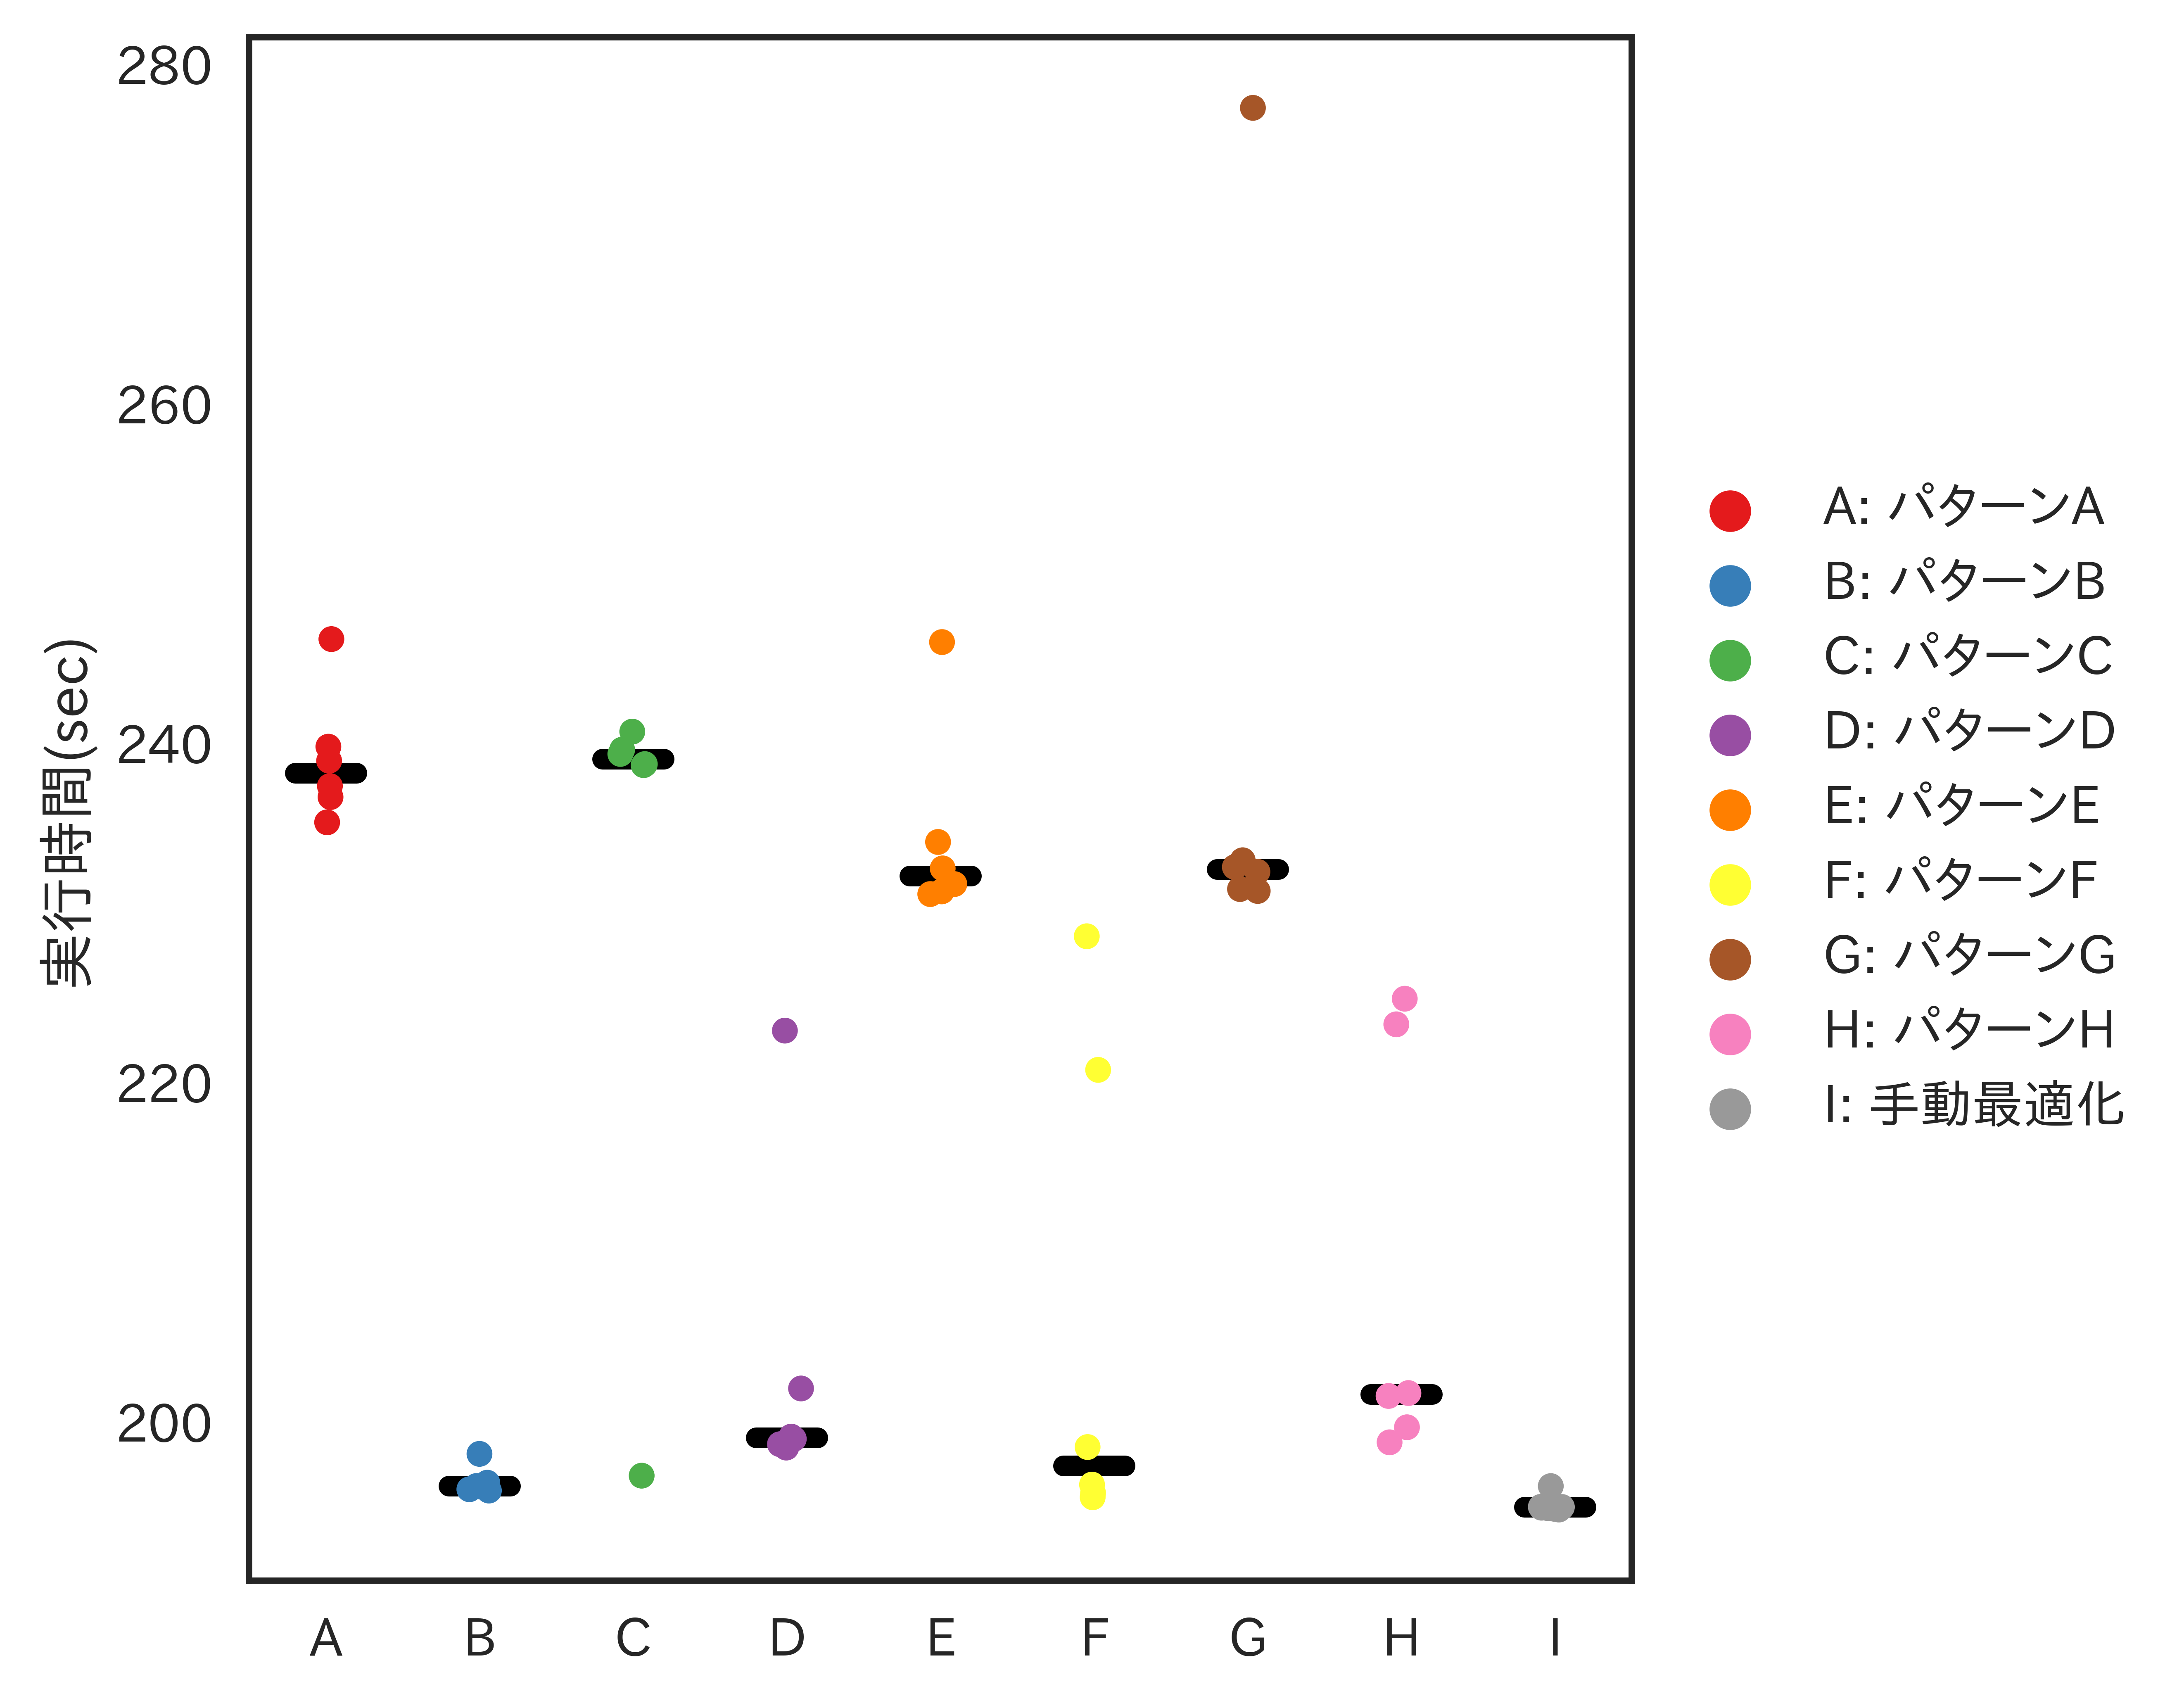

In [10]:
df = pd.read_csv("cluster/data/2018-02-04_21-14/result_candidate.csv")
# df['time_avg'] = (df['time'] + df['time0'] + df['time1'] + df['time2'] + df['time3'] + df['time4']) / 6.0
# df = df.sort_values(by=["time_avg"]).reset_index(drop=True)
# time = df['time_avg'].values
data = defaultdict()
label = defaultdict()
for i in range(len(df)):
    c = chr(ord('A') + i)
    data["パターン{0}".format(c)] = [df.loc[i]['time'], df.loc[i]['time0'], df.loc[i]['time1'], df.loc[i]['time2'], df.loc[i]['time3'], df.loc[i]['time4']]
    label["パターン{0}".format(c)] = c
data["手動最適化"] = [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119]
label["手動最適化"] = chr(ord('A') + i + 1)
scatter_med(data, label, "compare-merge-array.pdf")

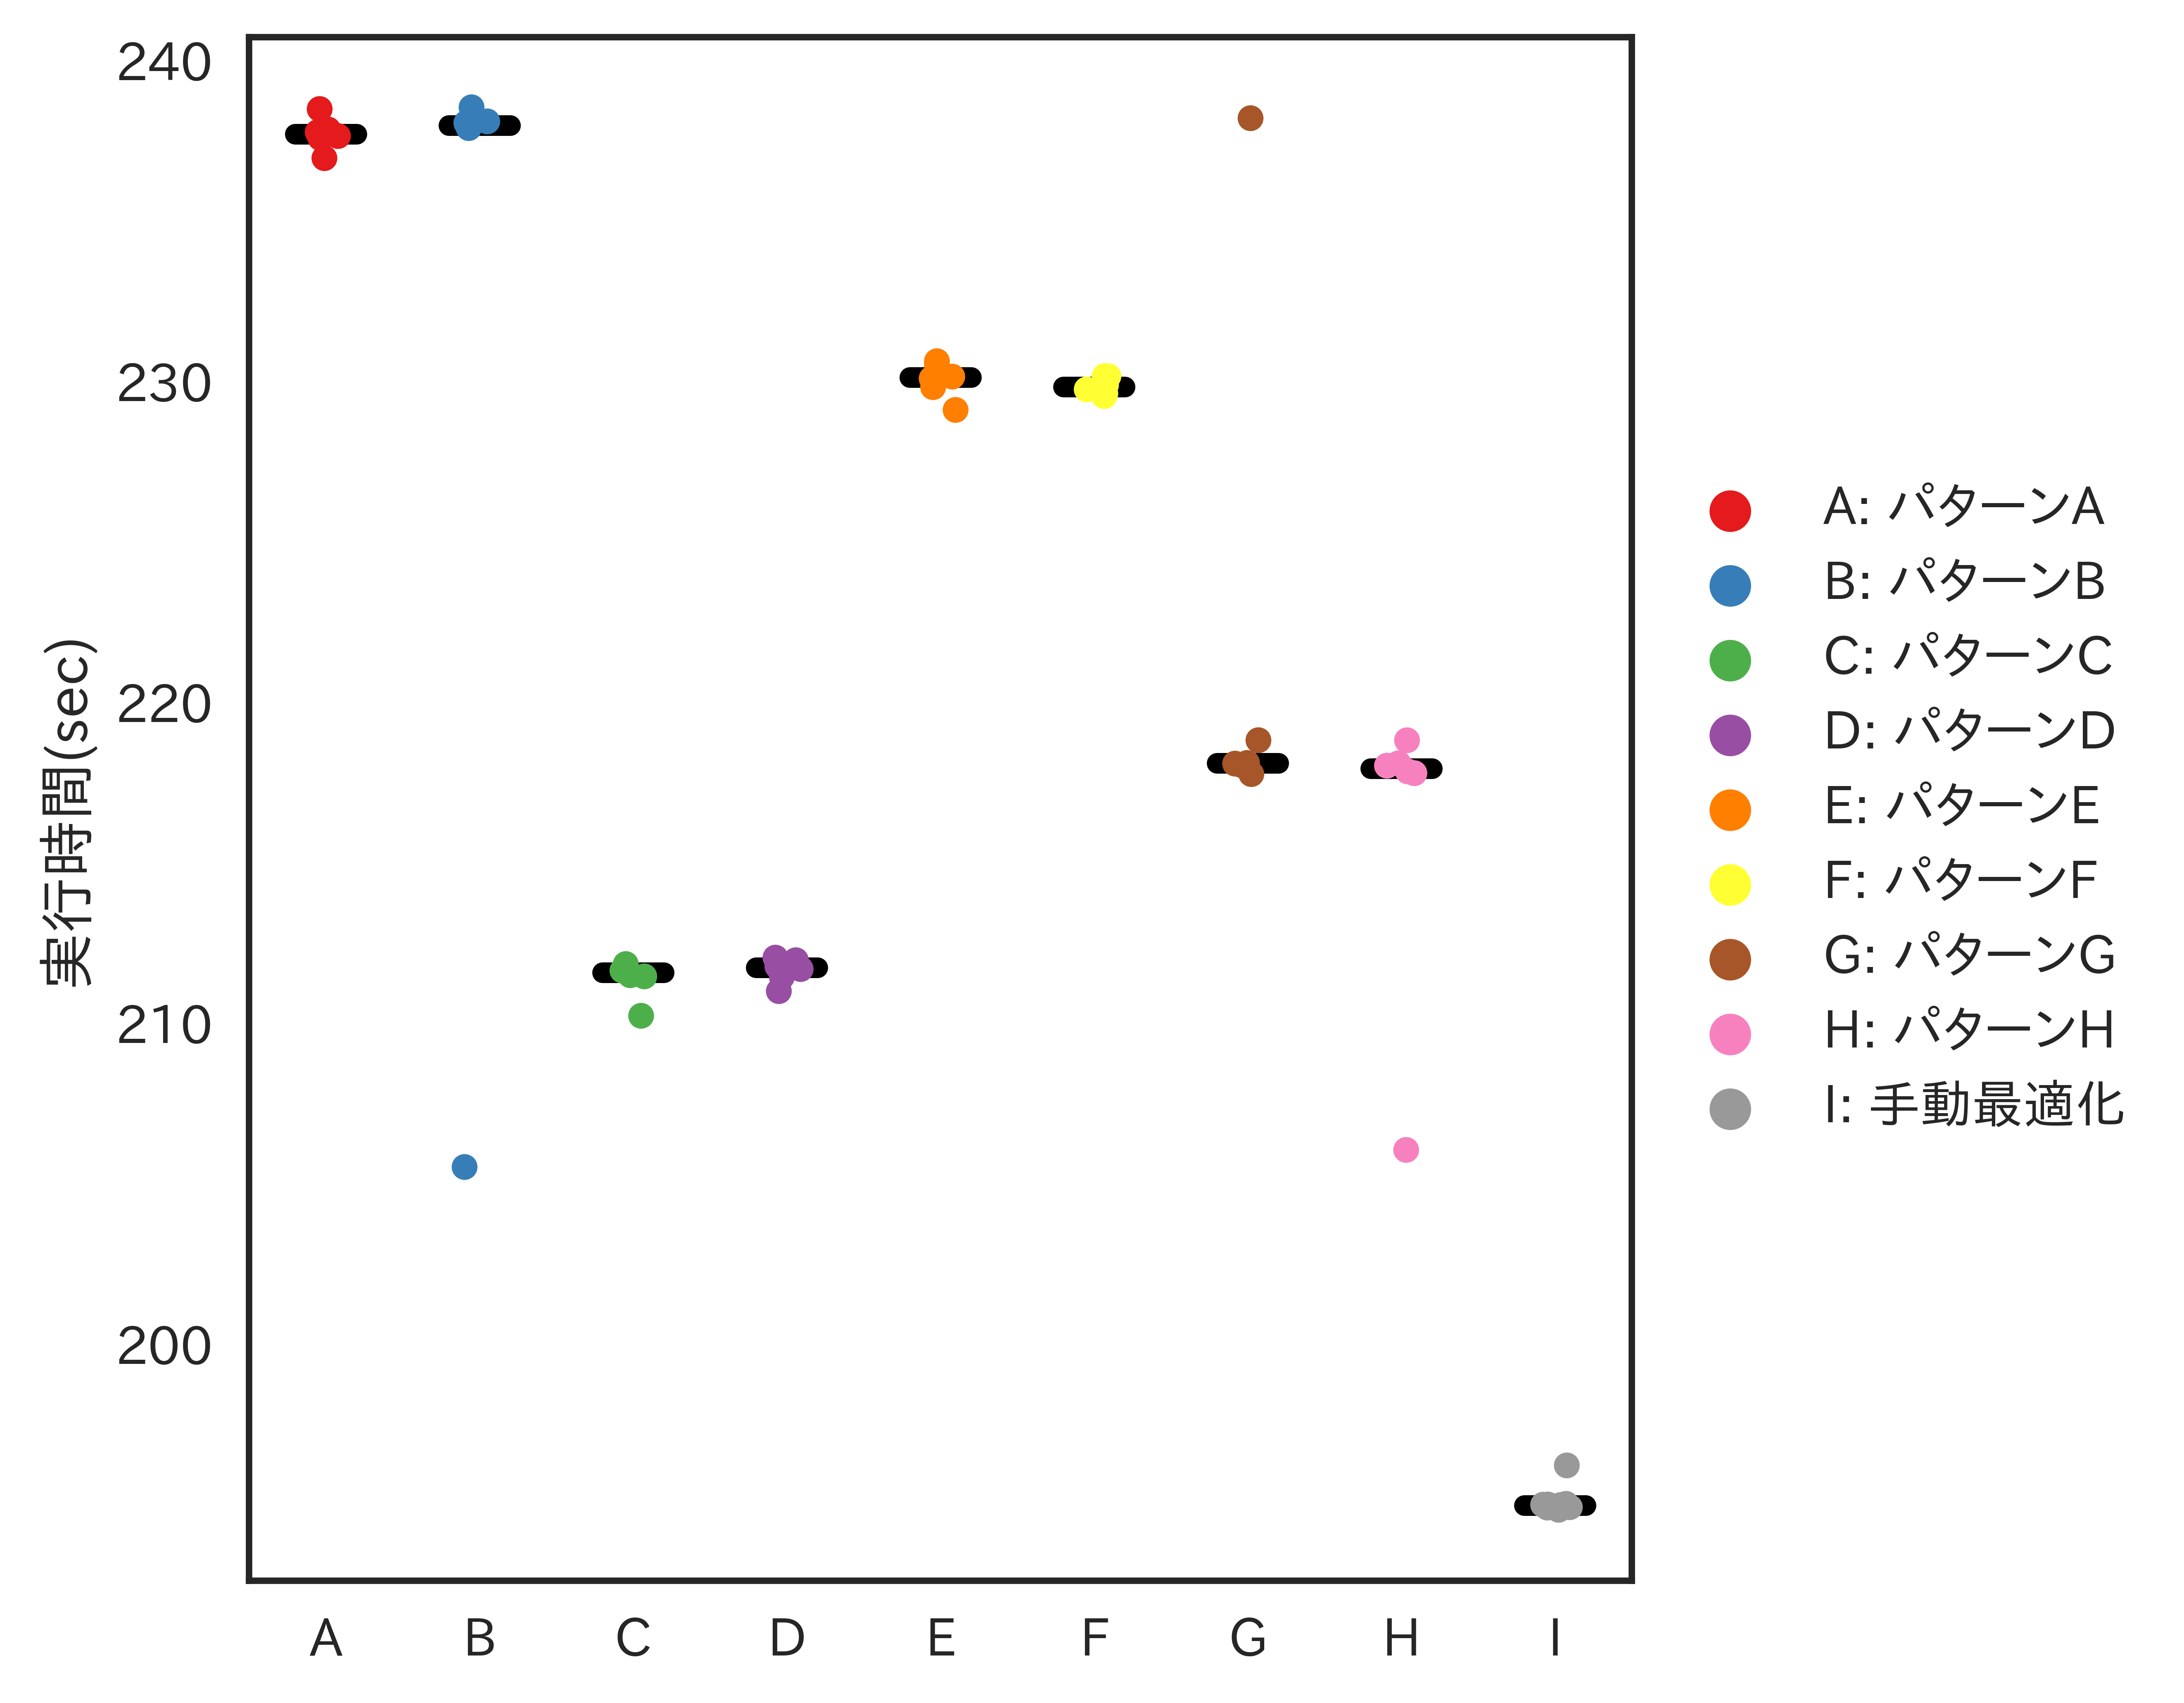

In [19]:
df = pd.read_csv("k/data/2018-02-04_23-09/result_candidate.csv")
# df['time_avg'] = (df['time'] + df['time0'] + df['time1'] + df['time2'] + df['time3'] + df['time4']) / 6.0
# df = df.sort_values(by=["time_avg"]).reset_index(drop=True)
# time = df['time_avg'].values
data = defaultdict()
label = defaultdict()
for i in range(len(df)):
    c = chr(ord('A') + i)
    data["パターン{0}".format(c)] = [df.loc[i]['time'], df.loc[i]['time0'], df.loc[i]['time1'], df.loc[i]['time2'], df.loc[i]['time3'], df.loc[i]['time4']]
    label["パターン{0}".format(c)] = c
data["手動最適化"] = [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119]
label["手動最適化"] = chr(ord('A') + i + 1)
scatter_med(data, label, "compare-merge-array.pdf")